In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn2, venn3
import os

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='.'
legend=False

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)

In [5]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="inner")
    df["Significant"] = "No"
    return df

In [6]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns_plot = sns.lmplot(f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "blue", "red", "sienna"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)
    sns_plot = plt.gca()
    sns_plot.set_title(f"FCs between {FC_1_name} and {FC_2_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)


In [7]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [8]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"],
                          palette=["black", "blue", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    # sns_plot.set(xlim=xlim, ylim=ylim)

    print(pd.DataFrame(df_all["Significant"].value_counts()))

In [9]:
!ls ../03_WAGO_IPs

Snakefile	      create_rulegraph.sh  logs.2020.03.25  results.2020.03.25
config.yaml	      dag.png		   nohup.out	    rulegraph.png
create_dag.sh	      filegraph.png	   notebooks	    run_local.sh
create_filegrapsh.sh  logs		   results	    samples.tsv


In [10]:
# Input prefix
ips_prefix = "../03_WAGO_IPs/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

csr1_ip_prefix = "../04_csr_1_IP/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

In [11]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [12]:
# Input files

# IPs

# WAGO-1
ip__Input_WAGO_1__IP_WAGO_1_path = ips_prefix + "Input_WAGO-1__IP_WAGO-1" + suffix
ip__Input_WAGO_1__IP_WAGO_1_name = "IP_WAGO-1__over__Input_WAGO-1"

ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path = ips_prefix + "Input_WAGO-1_P3G__IP_WAGO-1_P3G" + suffix
ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name = "IP_WAGO-1_P3G__over__Input_WAGO-1_P3G"

ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path = ips_prefix + "Input_WAGO-1_dpf-3_null__IP_WAGO-1_dpf-3_null" + suffix
ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name = "IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null"

ip__IP_WAGO_1_P3G__IP_WAGO_1_path = ips_prefix + "IP_WAGO-1_P3G__IP_WAGO-1" + suffix
ip__IP_WAGO_1_P3G__IP_WAGO_1_name = "IP_WAGO-1__over__IP_WAGO-1_P3G"

ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_path = ips_prefix + "IP_WAGO-1_dpf-3_null__IP_WAGO-1" + suffix
ip__IP_WAGO_1_dpf_3_null__IP_WAGO_1_name = "IP_WAGO-1__over__IP_WAGO-1_dpf-3_null"

# WAGO-3
ip__Input_WAGO_3__IP_WAGO_3_path = ips_prefix + "Input_WAGO-3__IP_WAGO-3" + suffix
ip__Input_WAGO_3__IP_WAGO_3_name = "IP_WAGO-3__over__Input_WAGO-3"

ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_path = ips_prefix + "Input_WAGO-3_dpf-3_null__IP_WAGO-3_dpf-3_null" + suffix
ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_name = "IP_WAGO-3_dpf-3_null__over__Input_WAGO-3_dpf-3_null"

ip__IP_WAGO_3_P3G__IP_WAGO_3_path = ips_prefix + "IP_WAGO-3_P3G__IP_WAGO-3" + suffix
ip__IP_WAGO_3_P3G__IP_WAGO_3_name = "IP_WAGO-3__over__IP_WAGO-3_P3G"

ip__IP_WAGO_3_dpf_3_null__IP_WAGO_3_path = ips_prefix + "IP_WAGO-3_dpf-3_null__IP_WAGO-3" + suffix
ip__IP_WAGO_3_dpf_3_null__IP_WAGO_3_name = "IP_WAGO-3__over__IP_WAGO-3_dpf-3_null"

# csr-1
ip__csr_1_input__csr_1_IP_path = csr1_ip_prefix + "csr-1_input__csr-1_IP" + suffix
ip__csr_1_input__csr_1_IP_name = "IP_csr-1__over__csr-1_input"

#### important note: we perform an inner join in the merge

## 11. Small RNAs bound by CSR-1—WAGO-1 bound

In [13]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_2_name = ip__Input_WAGO_1__IP_WAGO_1_name

Significant
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...         3227
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...         2064
No                                                         1381
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...          424

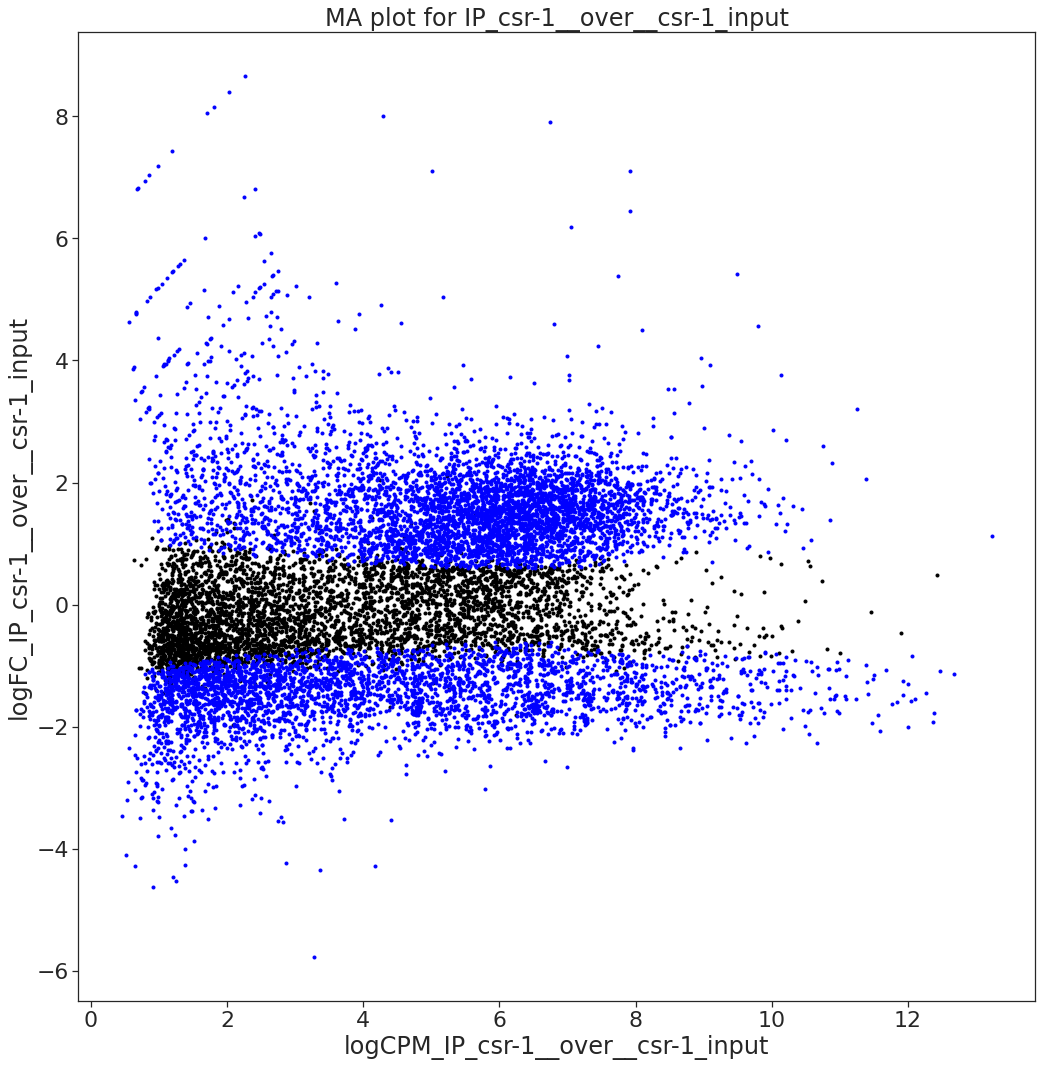

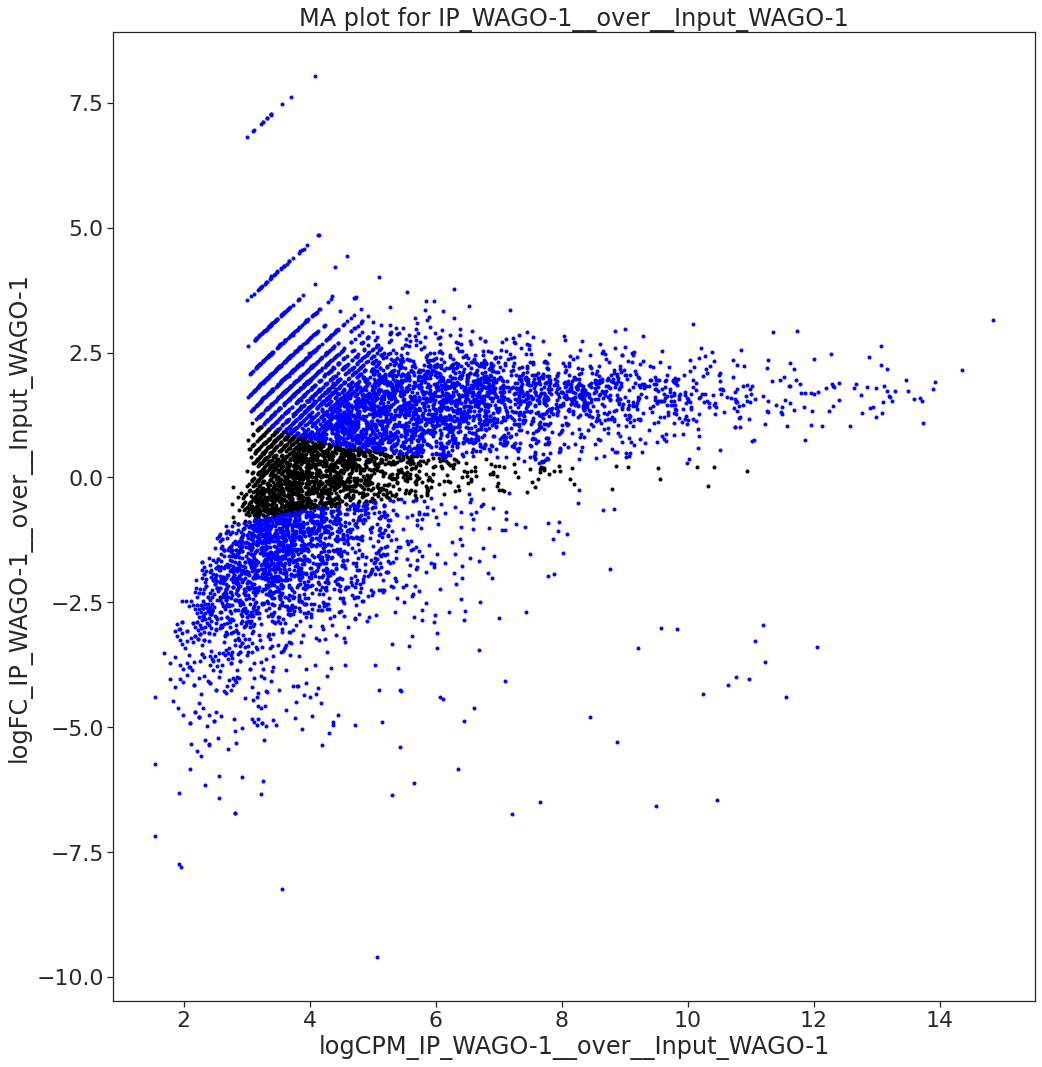

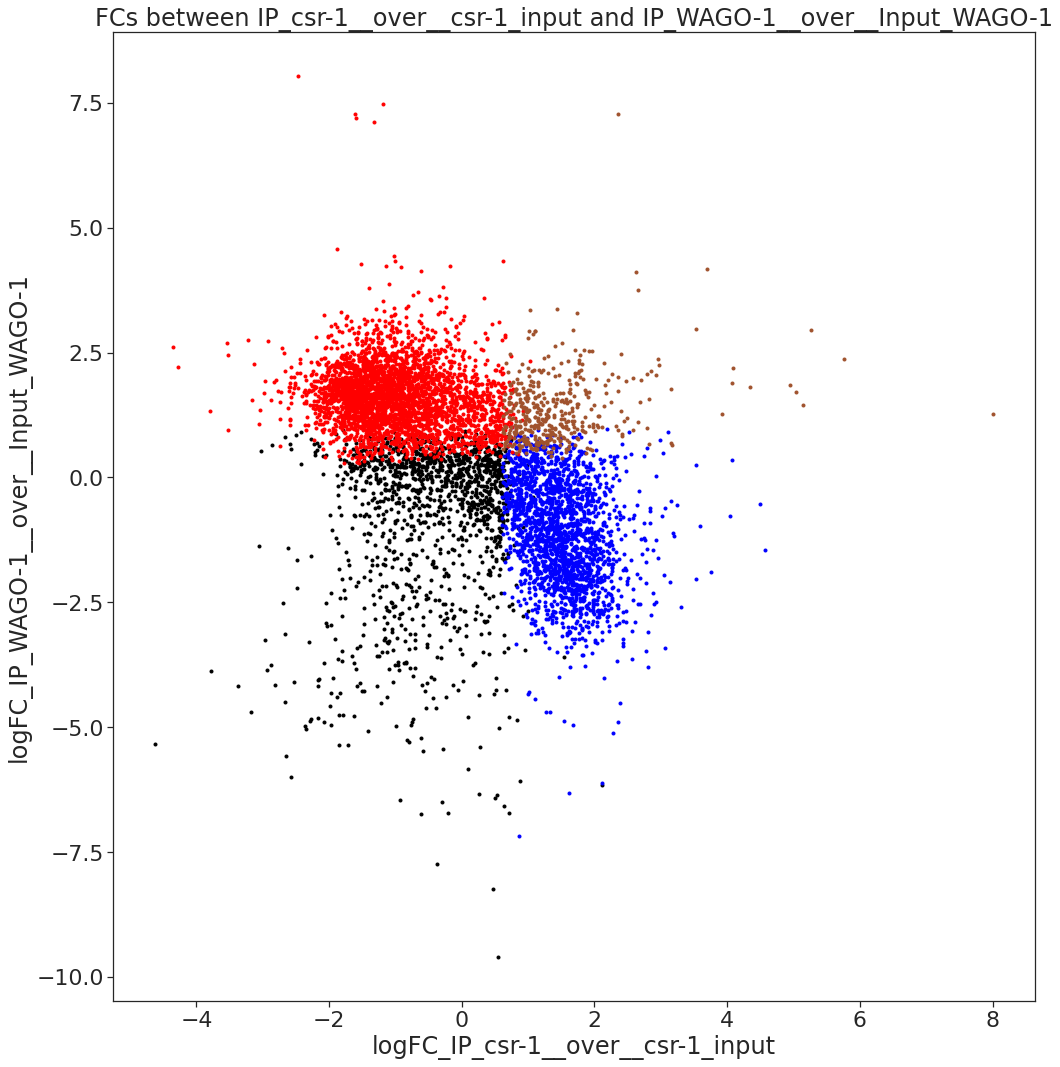

In [14]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

## 12. Small RNAs bound by CSR-1—WAGO-1 P3G bound

In [15]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path
df_2_name = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name

Significant
FDR_IP_WAGO-1_P3G__over__Input_WAGO-1_P3G<0.05\...         3209
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...         2385
No                                                         1389
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...          398

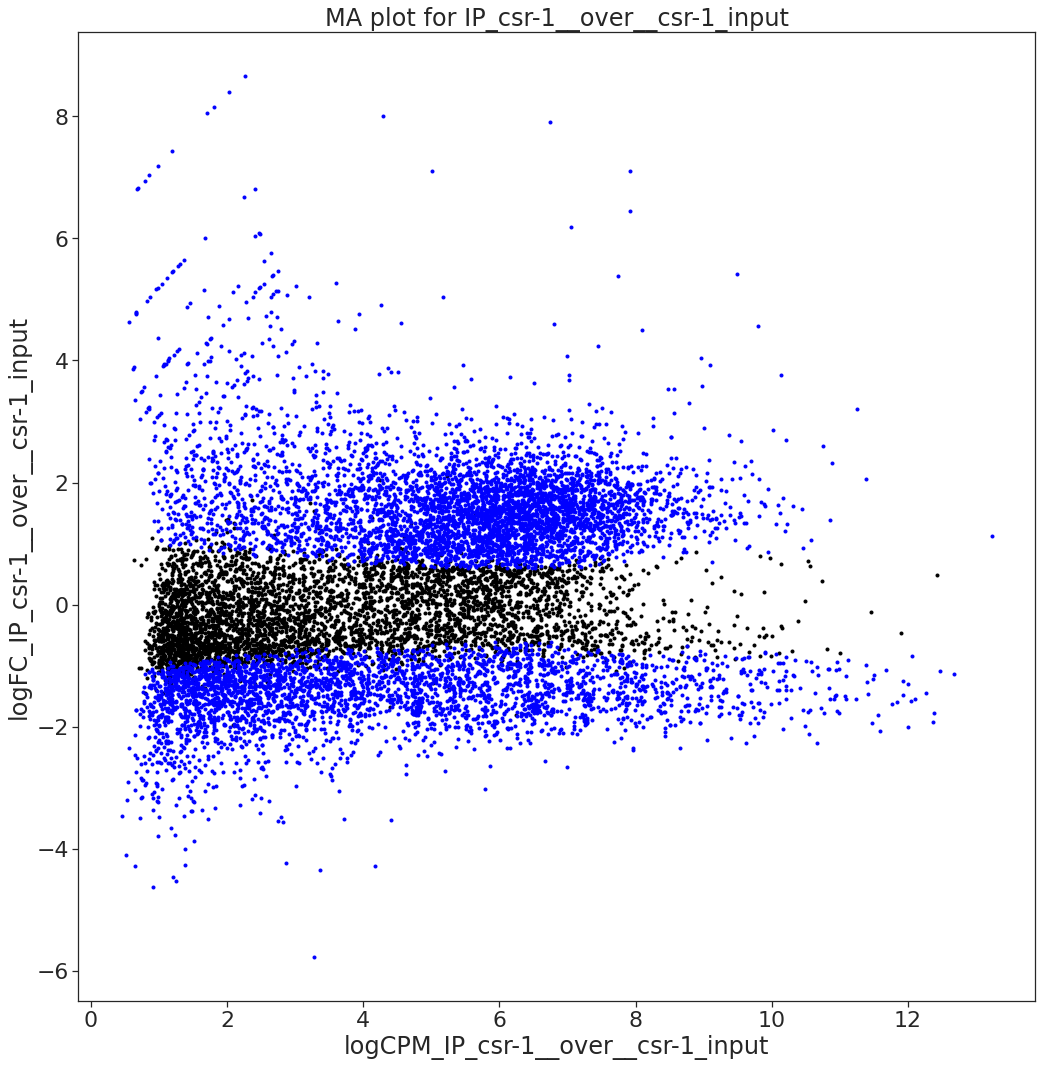

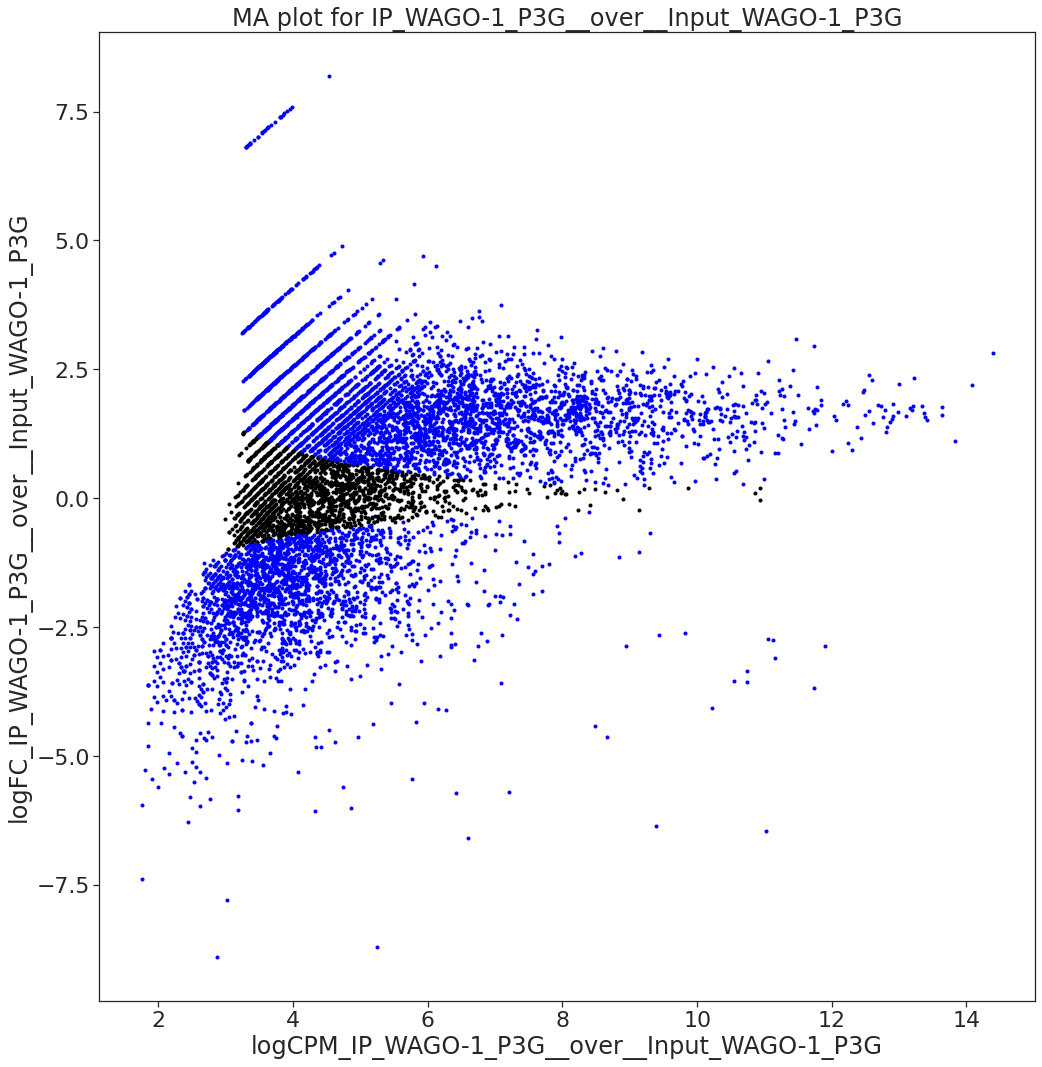

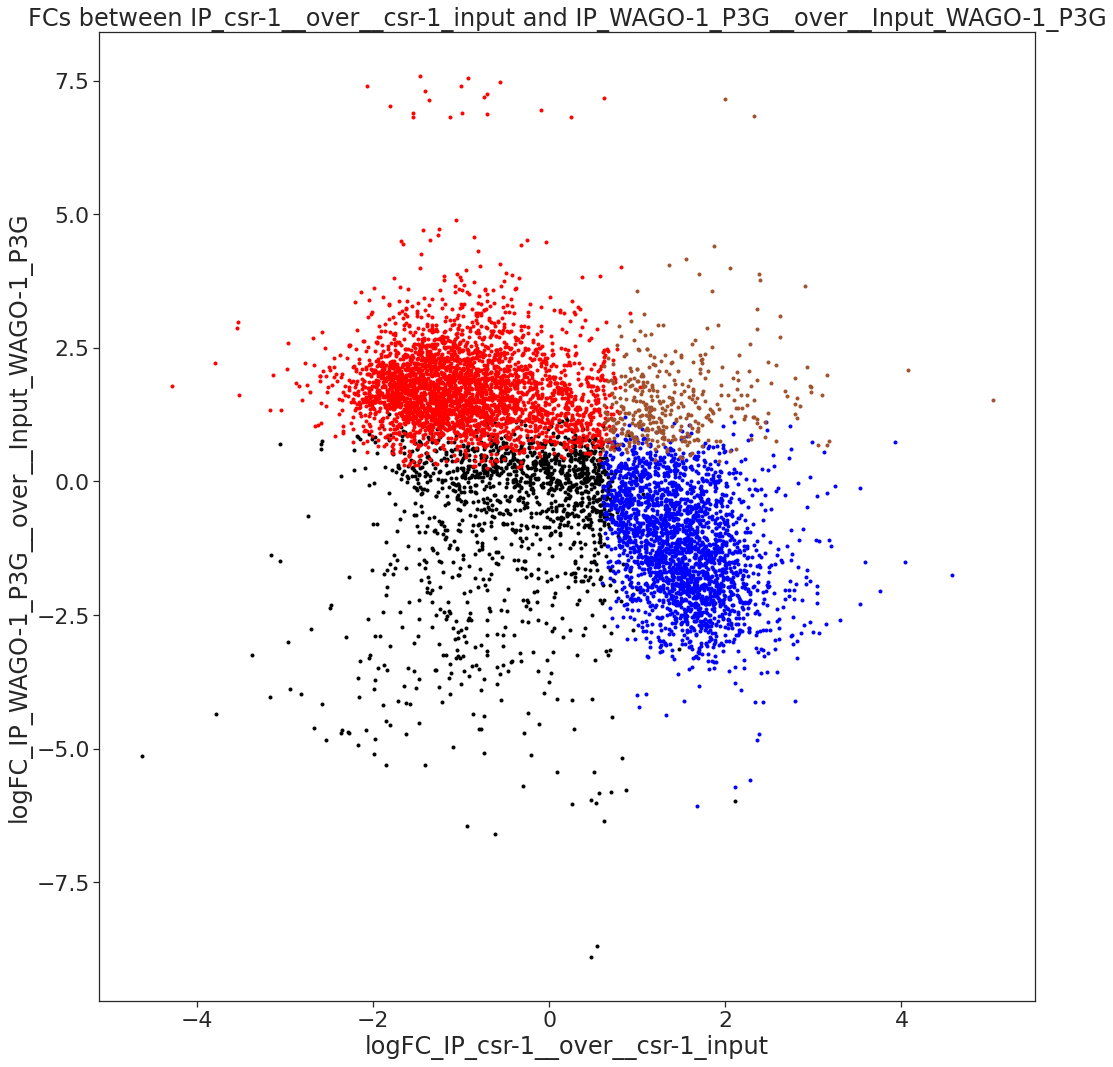

In [16]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

## 13. Small RNAs bound by CSR-1--- WAGO-1 bound in dpf-3 null

In [17]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_2_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

Significant
FDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dp...         3400
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...         3066
No                                                         1771
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...          594

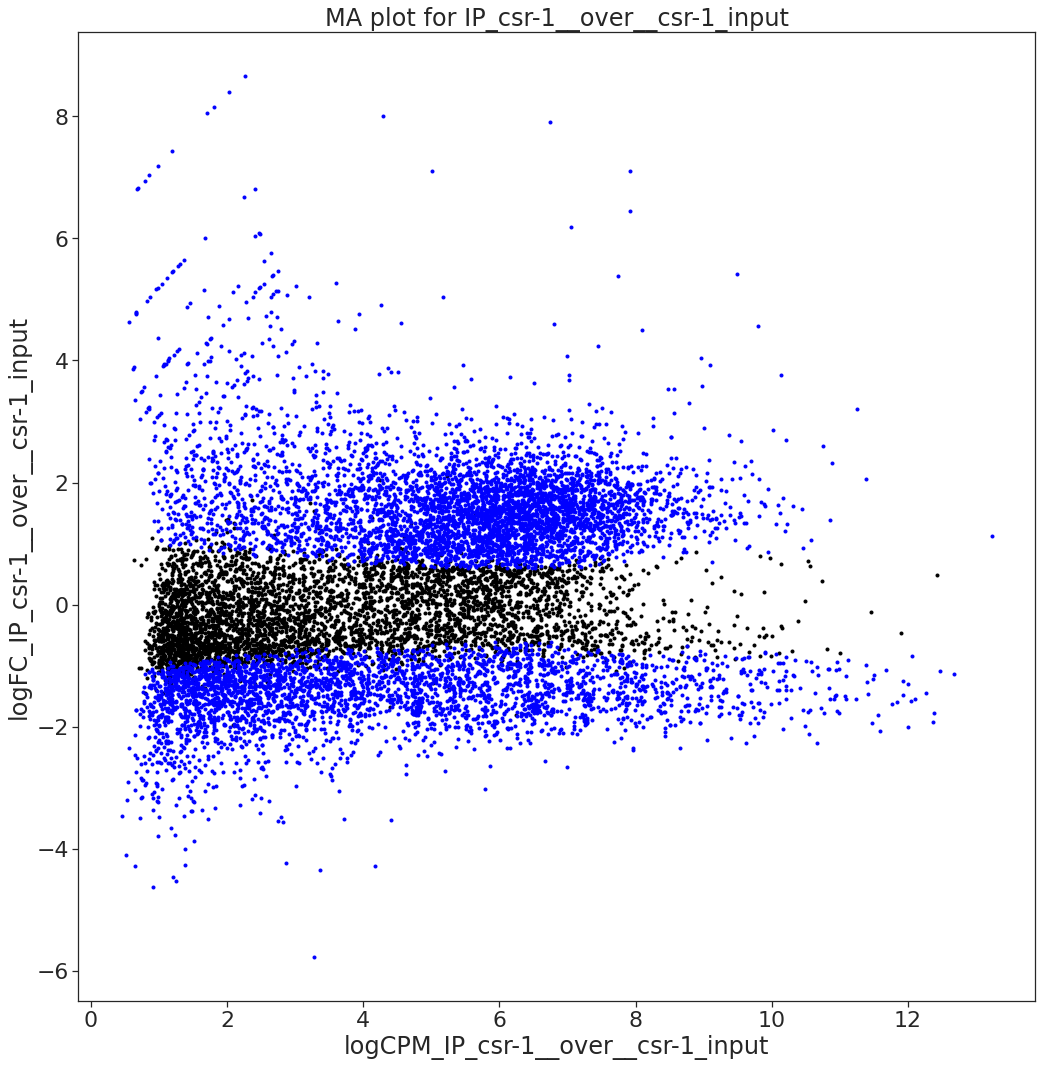

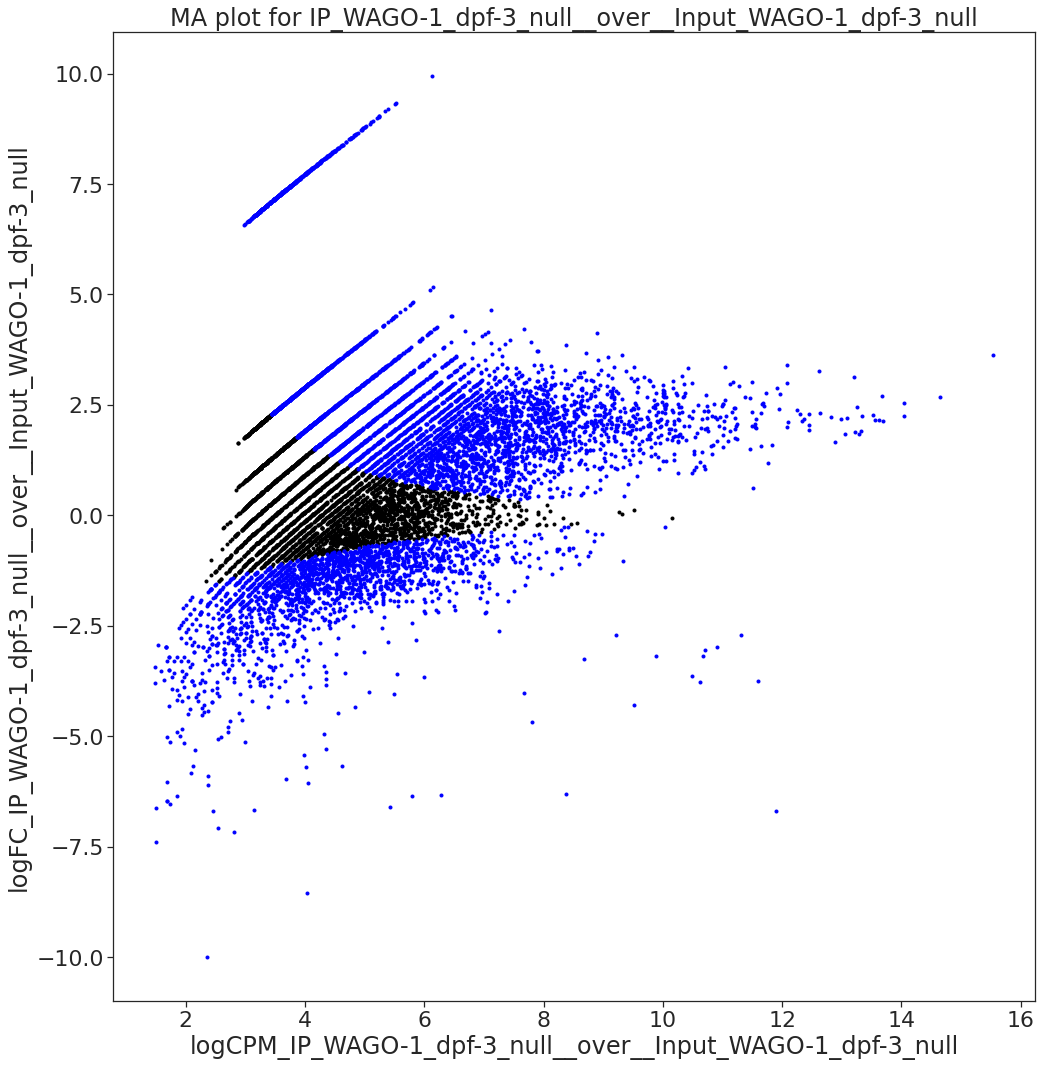

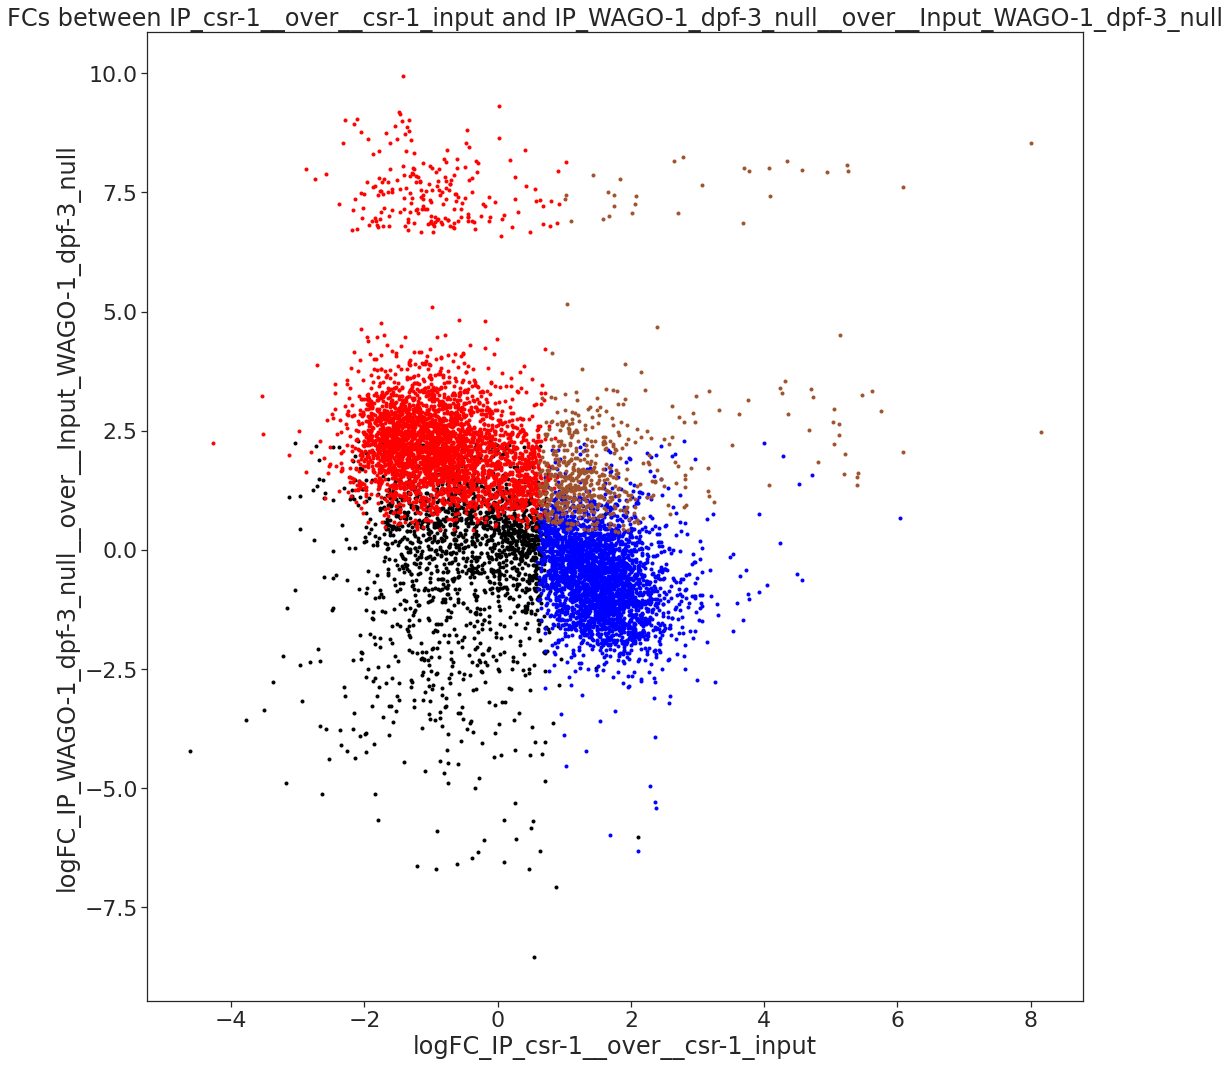

In [18]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

## 14. Small RNAs bound by CSR-1—WAGO-3 bound

In [19]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_2_name = ip__Input_WAGO_3__IP_WAGO_3_name

Significant
FDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_I...         2766
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...         1827
No                                                         1039
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...          426

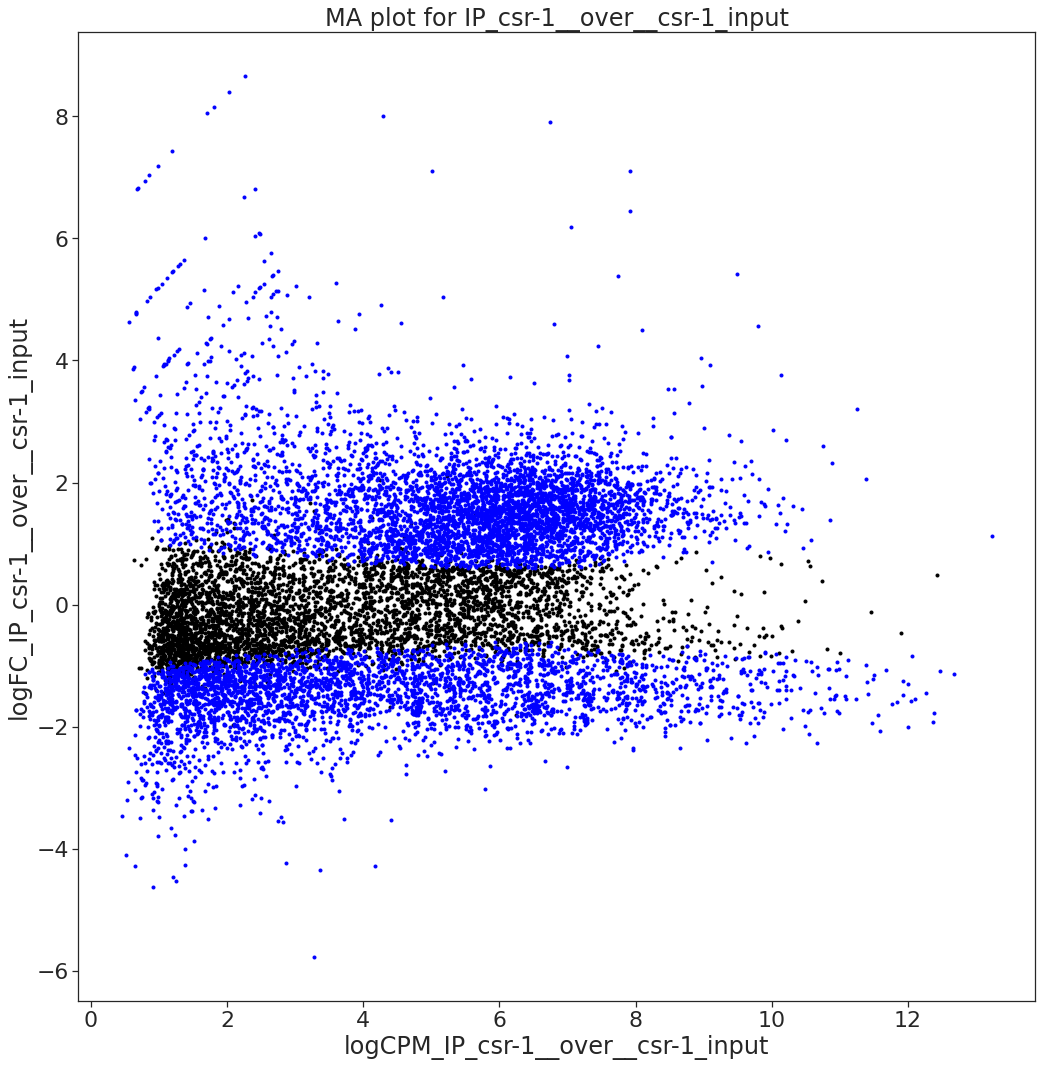

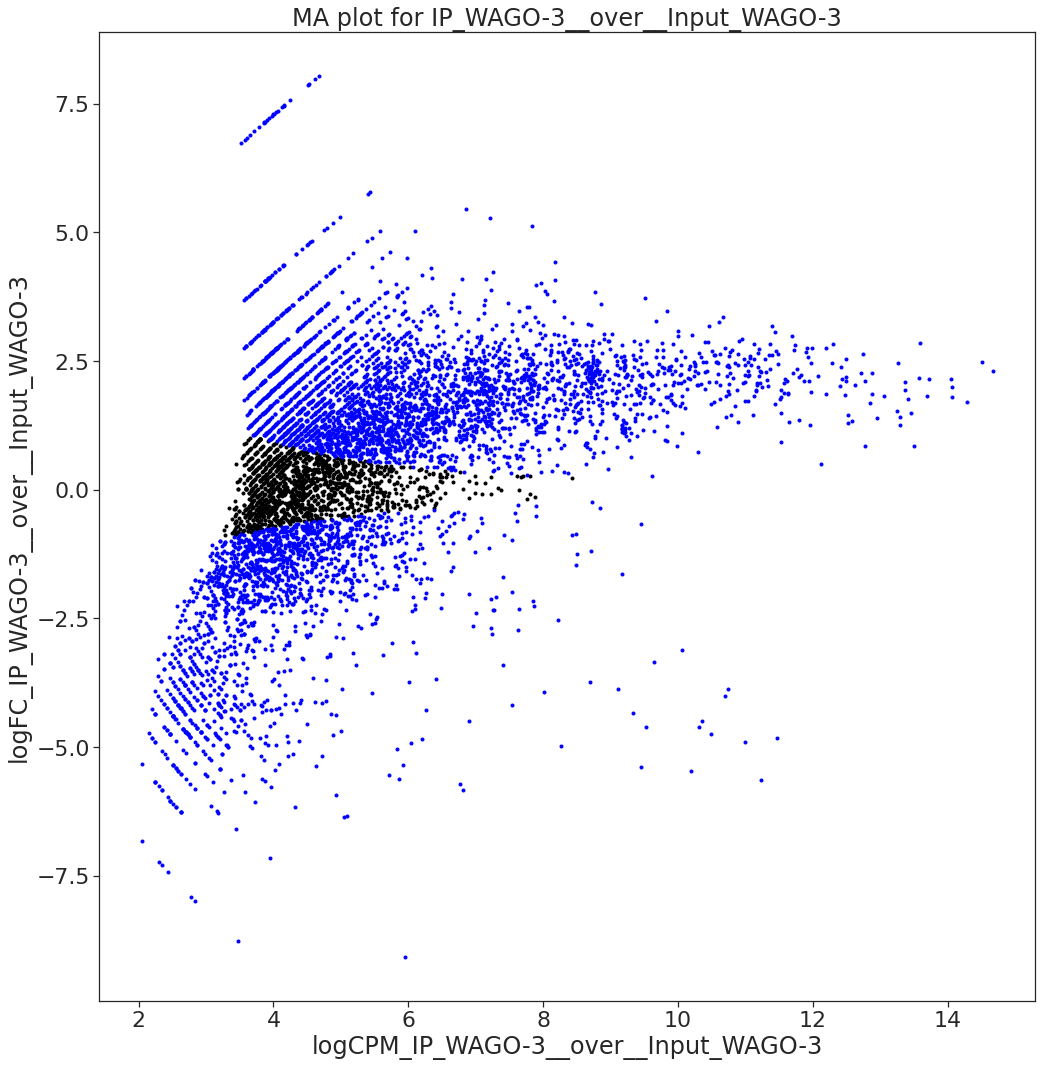

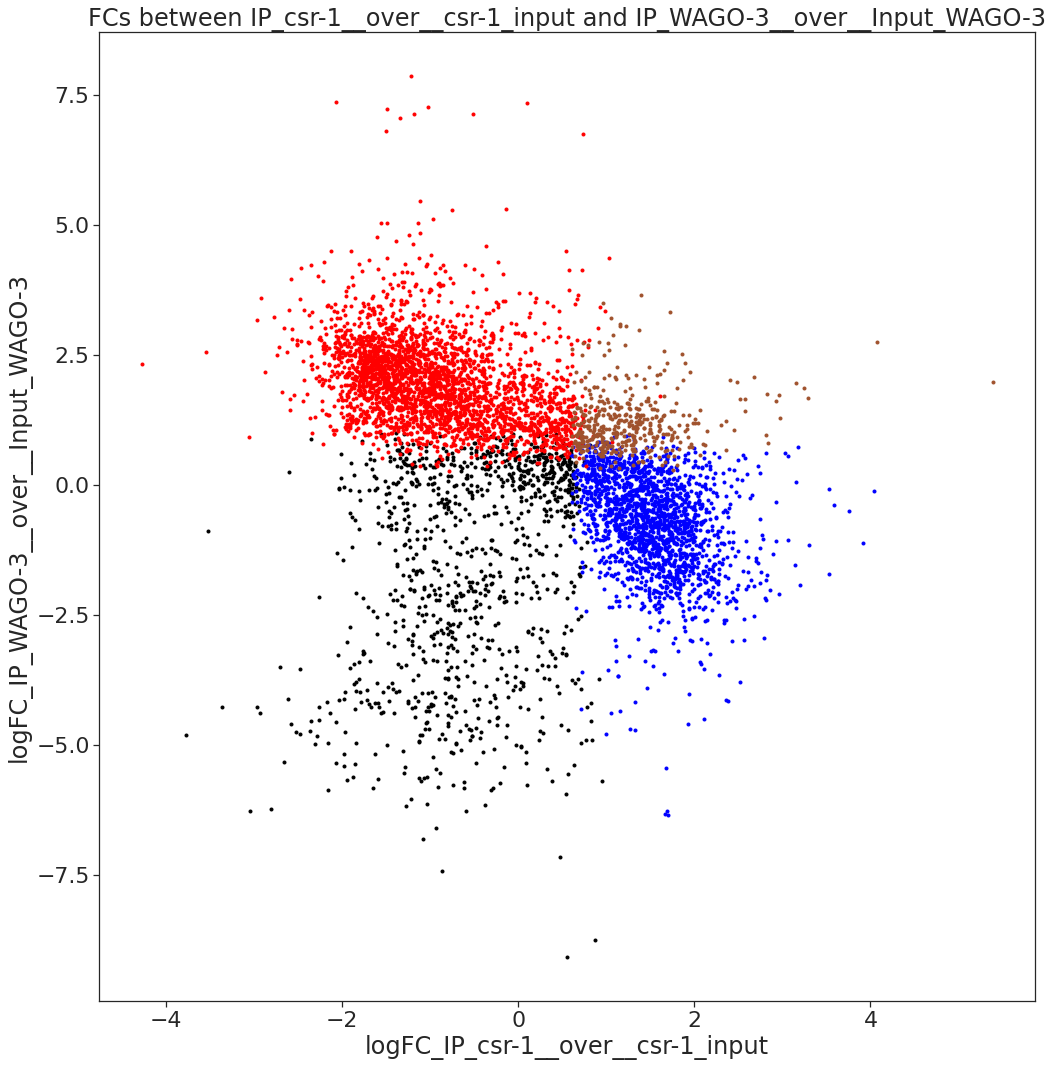

In [20]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

## 15. Small RNAs bound by CSR-1—WAGO-3 dpf-3 null bound

In [21]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

df_2_path = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_path
df_2_name = ip__Input_WAGO_3_dpf_3_null__IP_WAGO_3_dpf_3_null_name

Significant
FDR_IP_WAGO-3_dpf-3_null__over__Input_WAGO-3_dp...         1634
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...         1401
No                                                          617
FDR_IP_csr-1__over__csr-1_input<0.05\nlogFC_IP_...          482

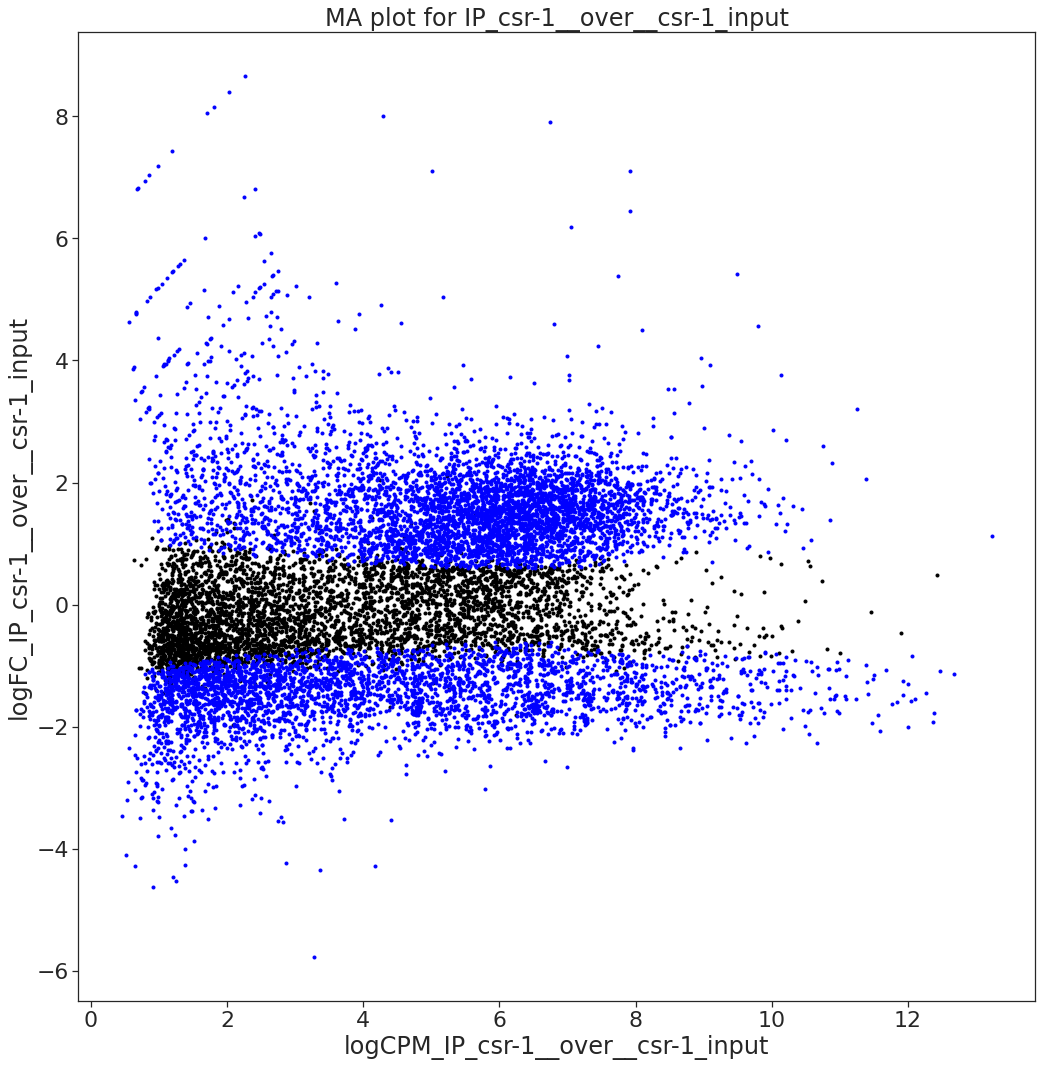

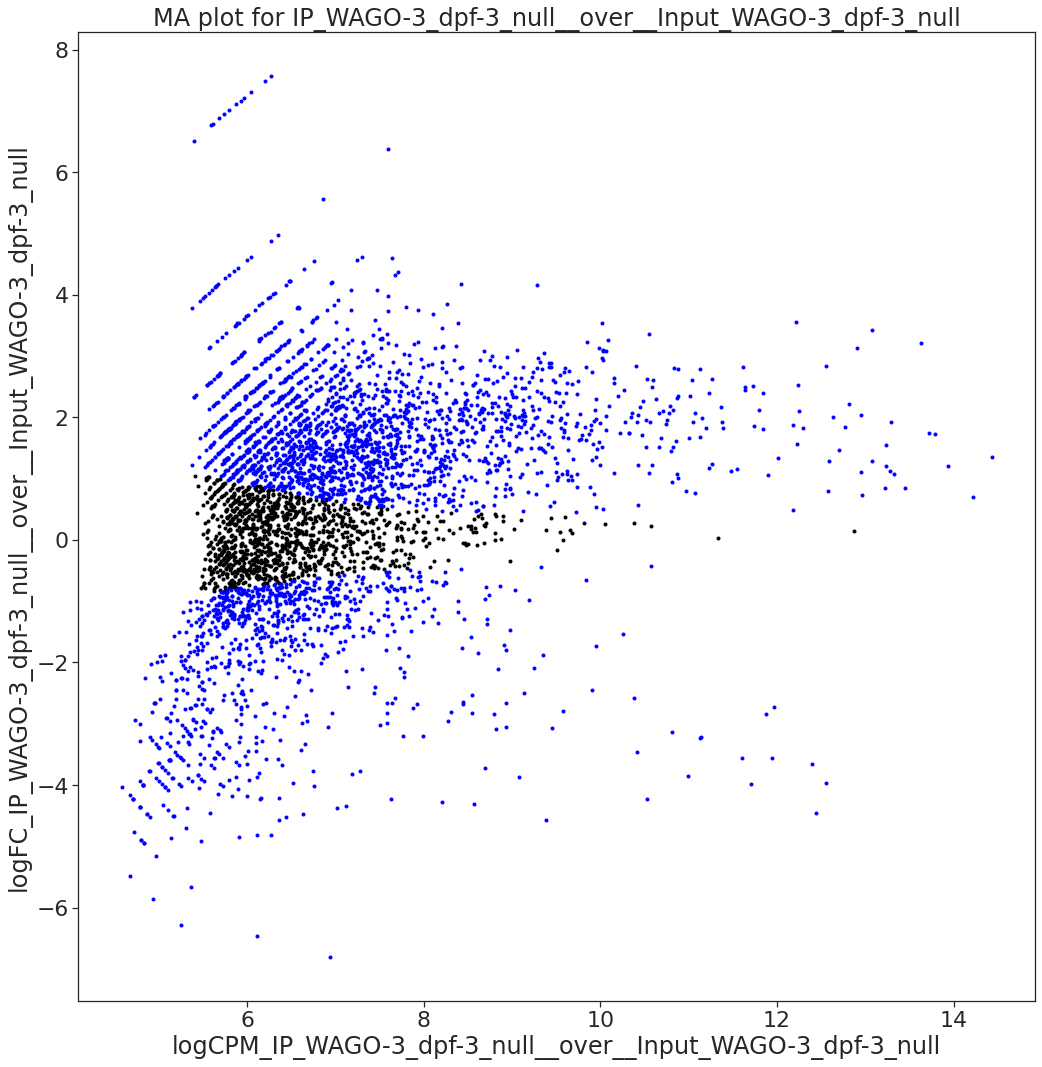

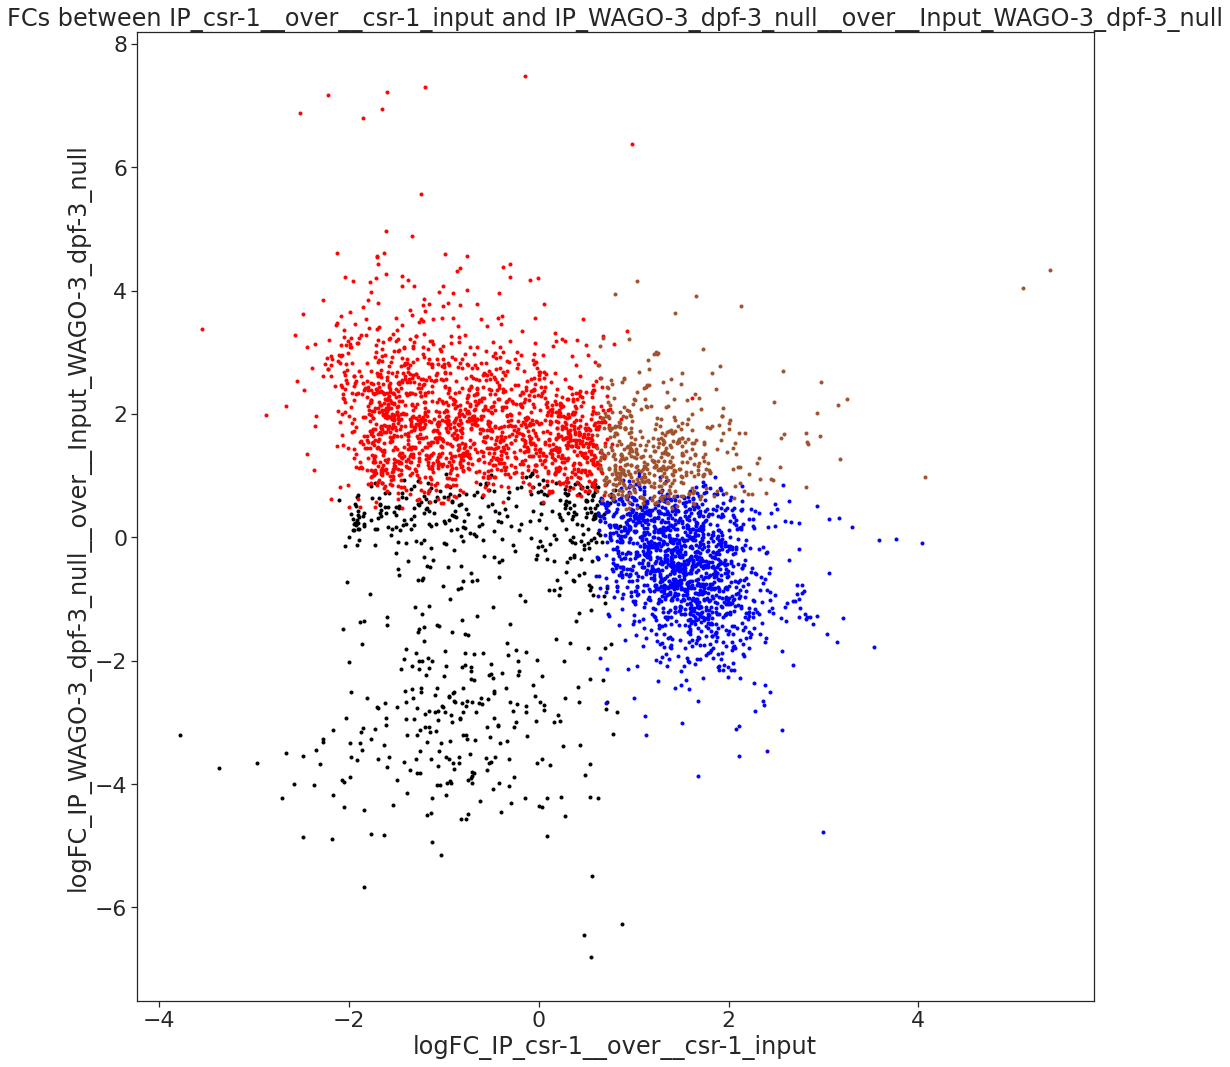

In [22]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())

## 16. WAGO-1 bound----WAGO-1 P3G bound

In [23]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path
df_2_name = ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name

logFC_IP_WAGO-1__over__Input_WAGO-1 logFC_IP_WAGO-1_P3G__over__Input_WAGO-1_P3G


Significant
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...         3600
No                                                         3229
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...          311
FDR_IP_WAGO-1_P3G__over__Input_WAGO-1_P3G<0.05\...          298

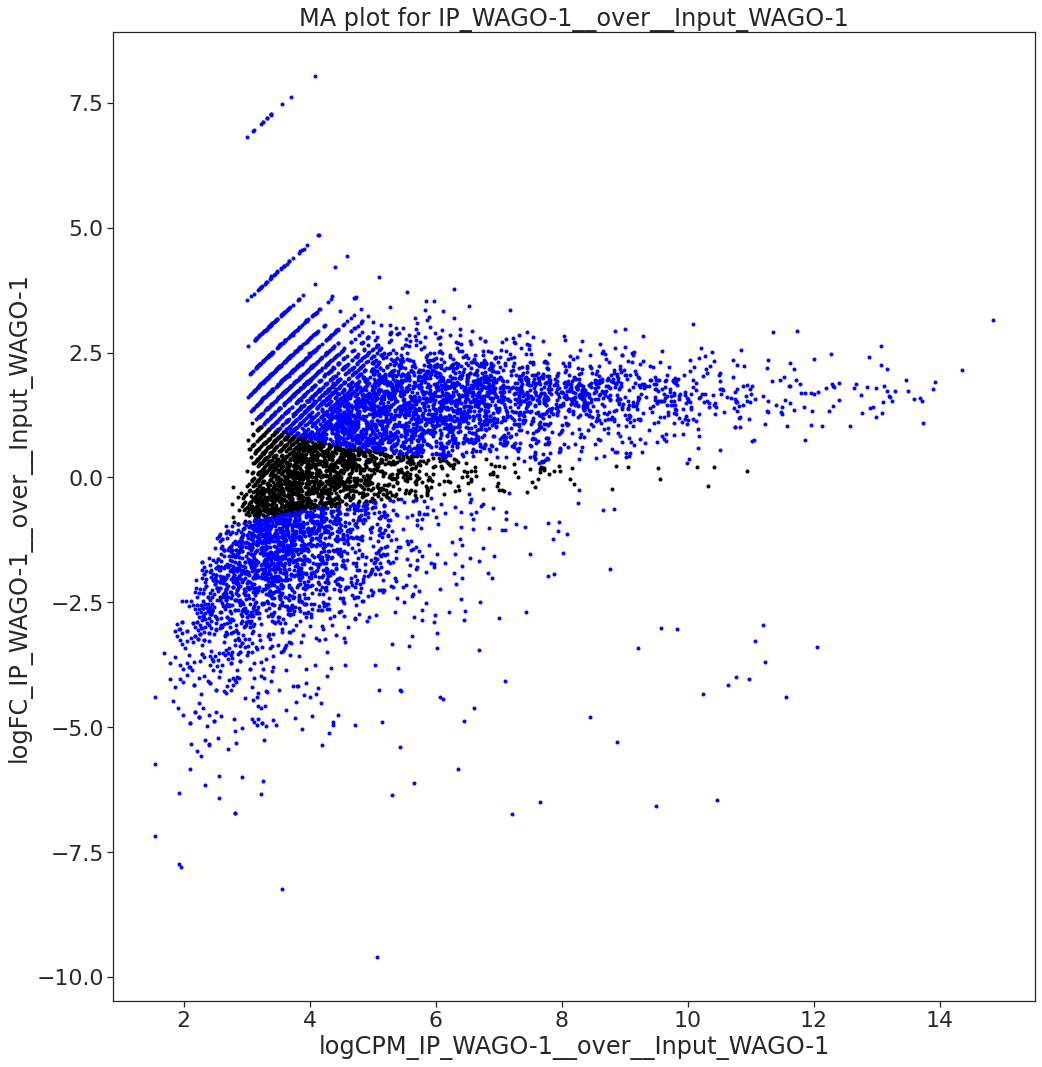

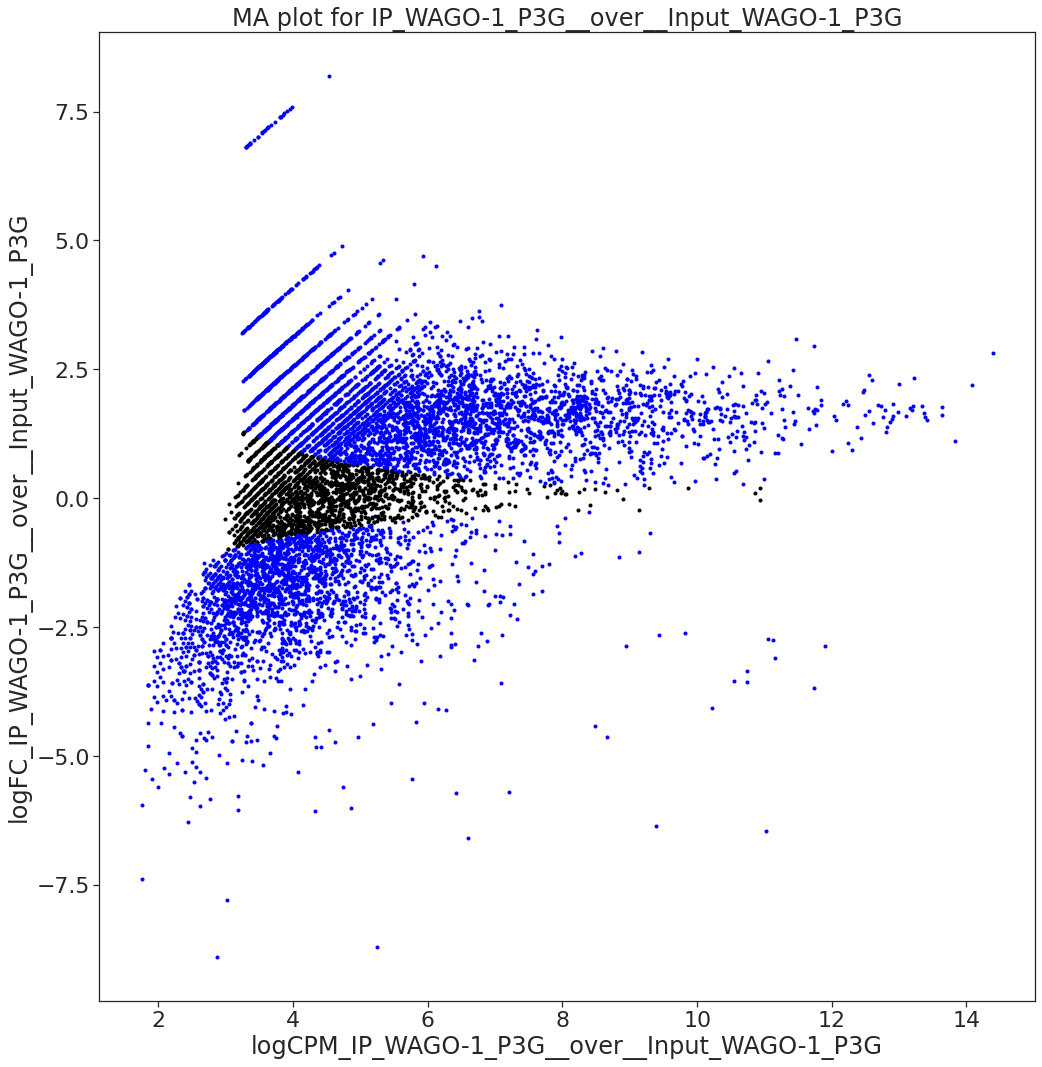

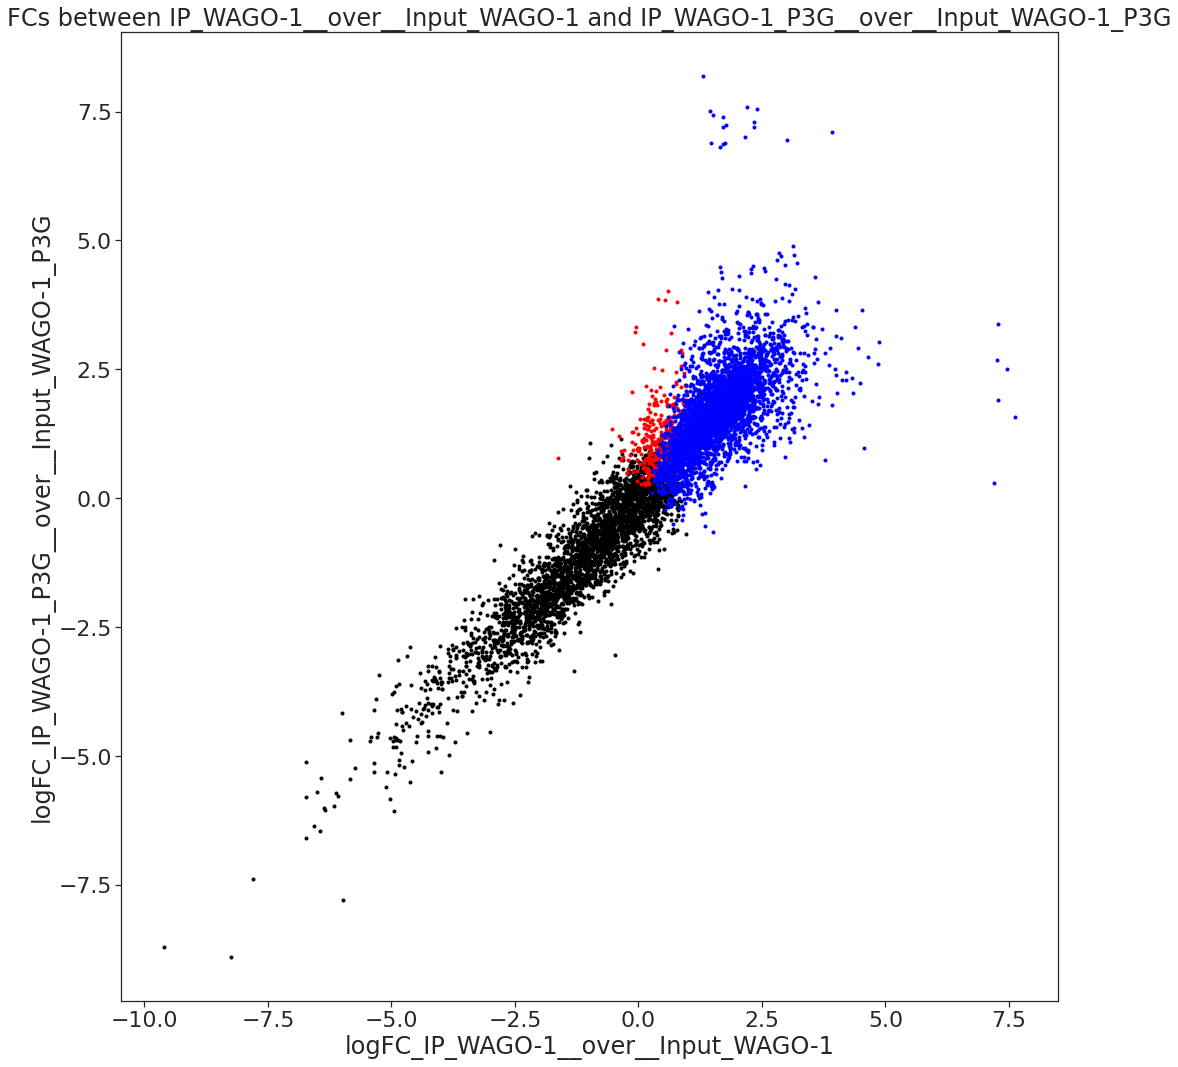

In [24]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

# print(pd.DataFrame(df_all["Significant"].value_counts()))

print(f"logFC_{df_1_name}", f"logFC_{df_2_name}")

sns_plot = sns.lmplot(x=f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "red", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

# plot_FC_correlation(df_all, 
#                     df_1_name, 
#                     df_2_name, 
#                     "Significant", 
#                     ["No", 
#                      f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
#                      f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
#                      f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())



## 17. Venn diagram of WAGO-1 & WAGO-1 P3G & WAGO-1 dpf-3 null

In [25]:
WAGO_1 = prepare_df(ip__Input_WAGO_1__IP_WAGO_1_path, ip__Input_WAGO_1__IP_WAGO_1_name)
WAGO_1_P3G = prepare_df(ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_path, ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name)
WAGO_1_dpf_3_null = prepare_df(ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path, ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name)

In [26]:
WAGO_1_specific = set(WAGO_1[(WAGO_1[f"logFC_{ip__Input_WAGO_1__IP_WAGO_1_name}"]>0) &
                         (WAGO_1[f"FDR_{ip__Input_WAGO_1__IP_WAGO_1_name}"]<0.05)]["id"])

In [27]:
WAGO_1_P3G_specific = set(WAGO_1_P3G[(WAGO_1_P3G[f"logFC_{ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name}"]>0) &
                                 (WAGO_1_P3G[f"FDR_{ip__Input_WAGO_1_P3G__IP_WAGO_1_P3G_name}"]<0.05)]["id"])

In [28]:
WAGO_1_dpf_3_null_specific = set(WAGO_1_dpf_3_null[(WAGO_1_dpf_3_null[f"logFC_{ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name}"]>0) &
                                 (WAGO_1_dpf_3_null[f"FDR_{ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name}"]<0.05)]["id"])

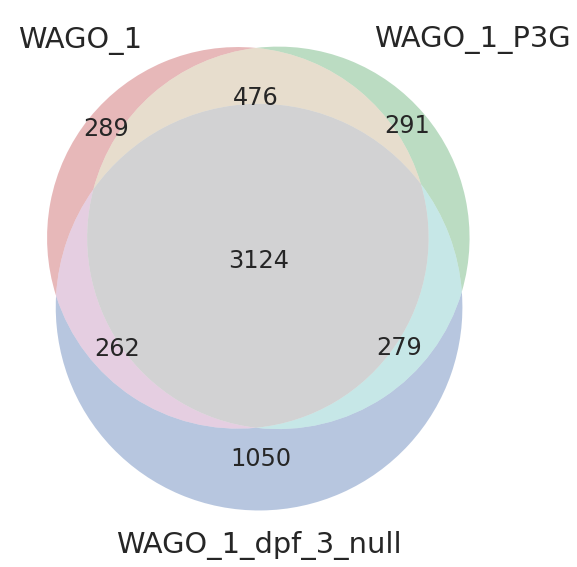

In [29]:
plt.figure(figsize=(10,10))
venn3([WAGO_1_specific, WAGO_1_P3G_specific, WAGO_1_dpf_3_null_specific], ['WAGO_1', 'WAGO_1_P3G', 'WAGO_1_dpf_3_null'])

In [30]:
WAGO_1_dpf_3_null_ONLY_953 = list(WAGO_1_dpf_3_null_specific - WAGO_1_P3G_specific - WAGO_1_specific)
WAGO_1_dpf_3_null[WAGO_1_dpf_3_null["id"].isin(WAGO_1_dpf_3_null_ONLY_953)].to_csv("WAGO_1_dpf_3_null_ONLY_953.tsv", header=True, sep="\t")

In [31]:
WAGO_1_P3G_ONLY_255 = list(WAGO_1_P3G_specific - WAGO_1_dpf_3_null_specific - WAGO_1_specific)
WAGO_1_P3G[WAGO_1_P3G["id"].isin(WAGO_1_P3G_ONLY_255)].to_csv("WAGO_1_P3G_ONLY_255.tsv", header=True, sep="\t")

In [32]:
WAGO_1_ONLY_187 = list(WAGO_1_specific - WAGO_1_P3G_specific - WAGO_1_dpf_3_null_specific)
WAGO_1[WAGO_1["id"].isin(WAGO_1_ONLY_187)].to_csv("WAGO_1_ONLY_187.tsv", header=True, sep="\t")

## 18. WAGO-1 bound----WAGO-1 bound in dpf-3 null background

In [33]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_path
df_2_name = ip__Input_WAGO_1_dpf_3_null__IP_WAGO_1_dpf_3_null_name

                                                    Significant
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...         3386
No                                                         3048
FDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dp...          586
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...          440


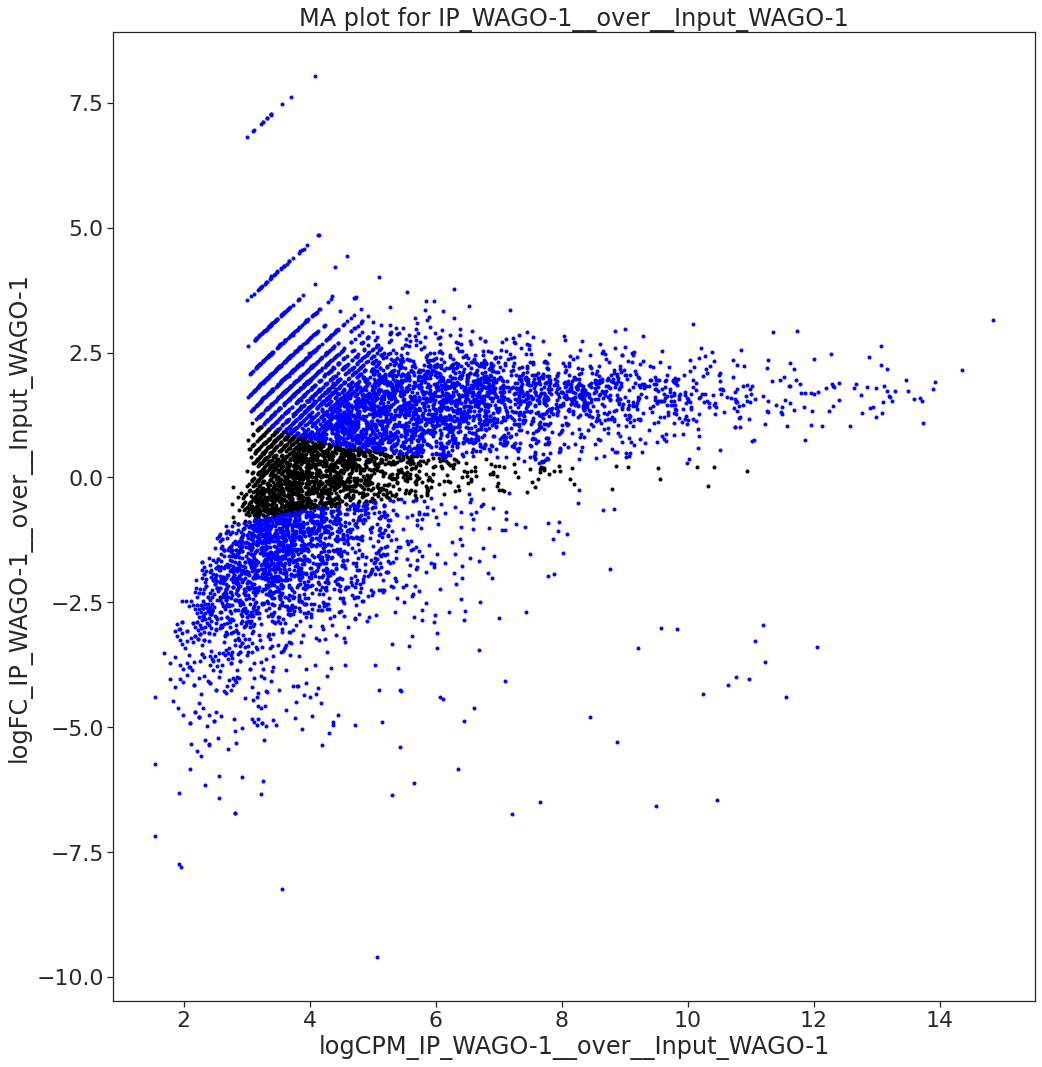

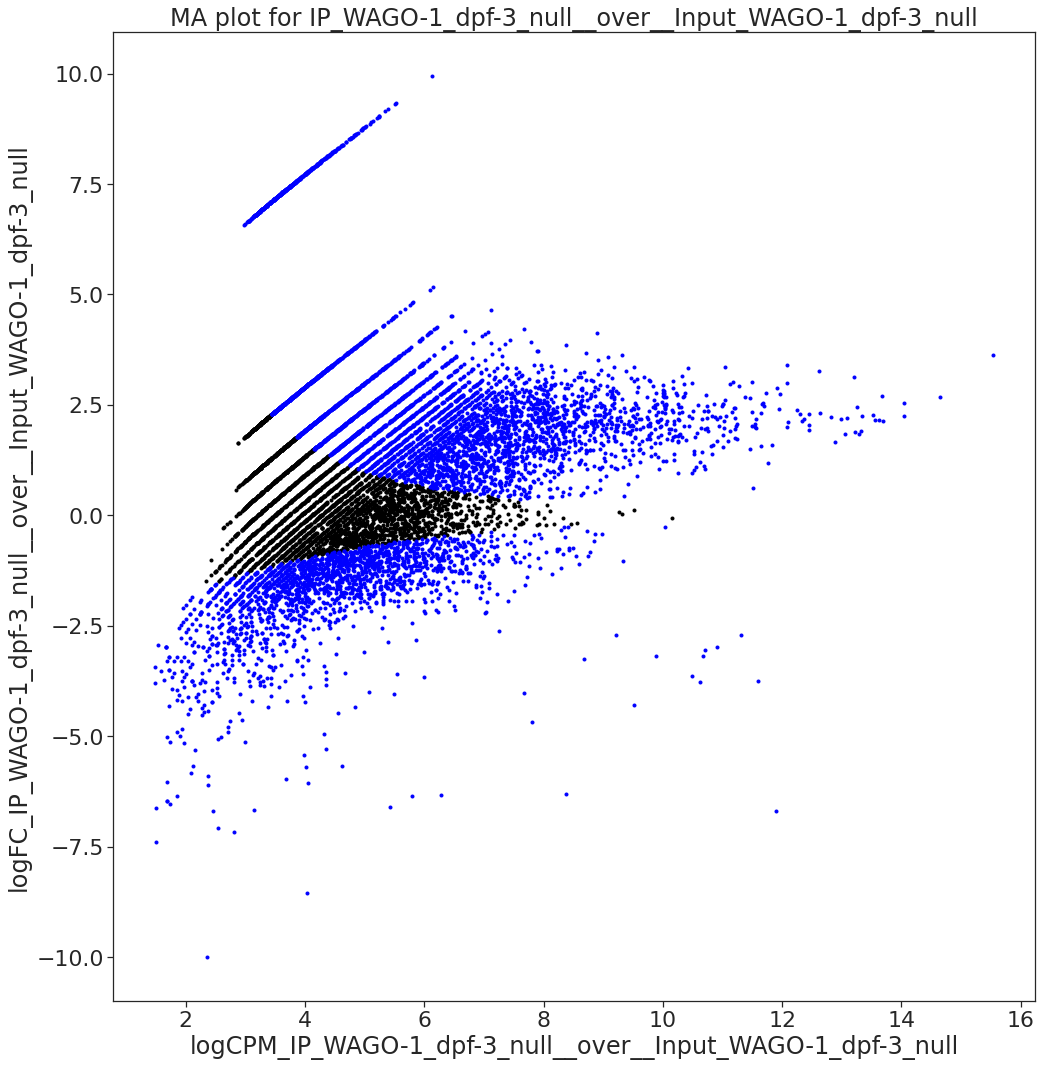

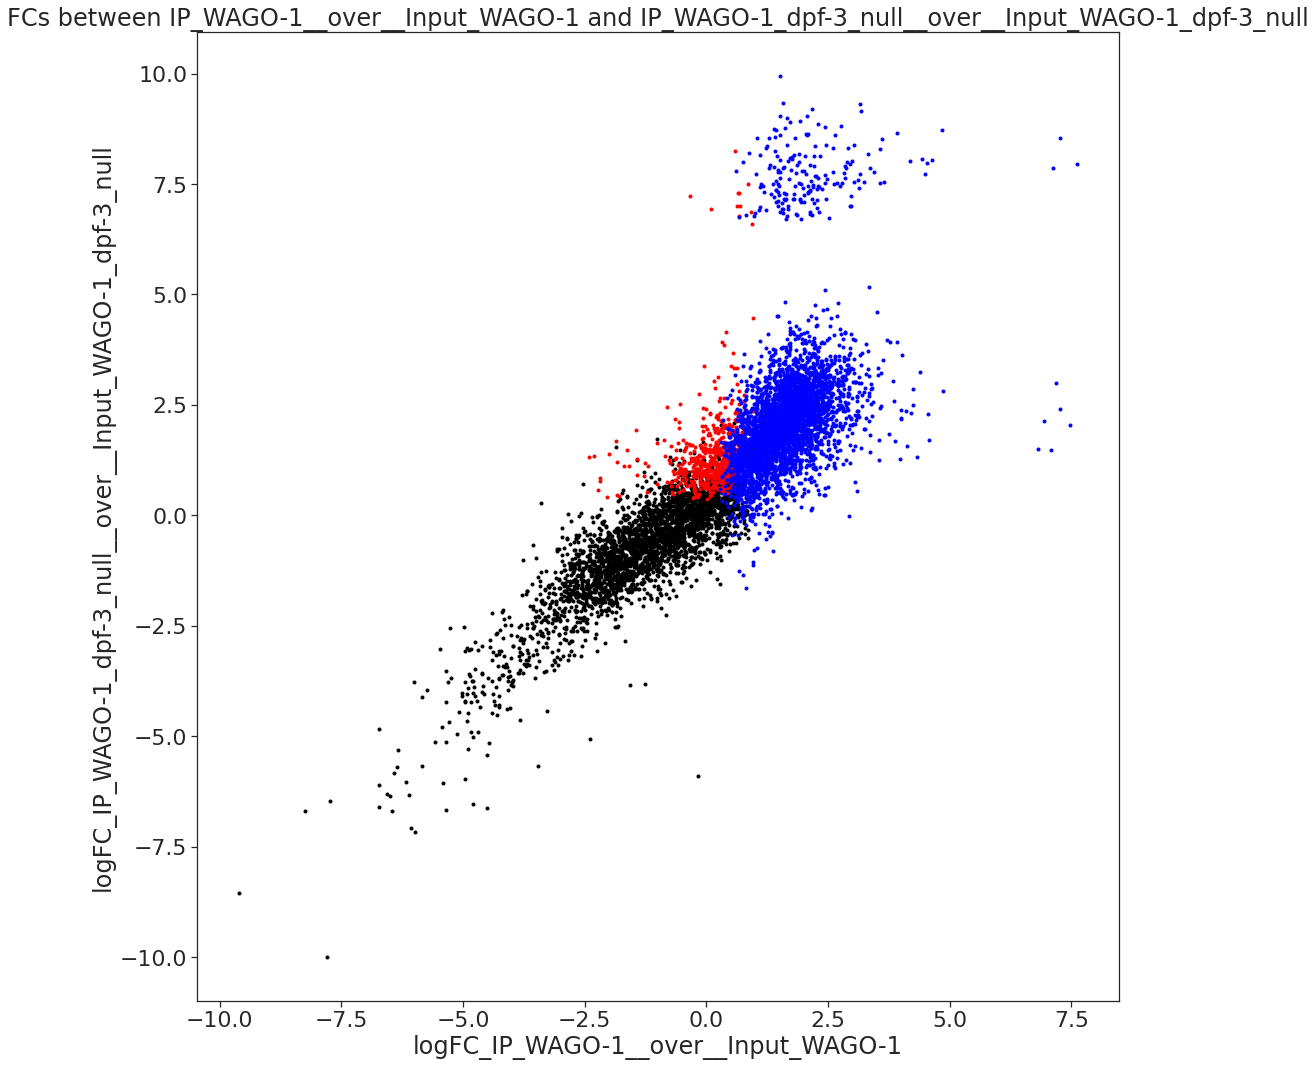

In [34]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"


sns_plot = sns.lmplot(x=f"logFC_{df_1_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue="Significant",
                      hue_order=["No", 
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0",
                                 f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                 f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"],
                      palette=["black", "blue", "red", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"FCs between {df_1_name} and {df_2_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

# plot_FC_correlation(df_all, 
#                     df_1_name, 
#                     df_2_name, 
#                     "Significant", 
#                     ["No", 
#                      f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
#                      f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
#                      f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

print(pd.DataFrame(df_all["Significant"].value_counts()))

plt.savefig(f"FC_vs_FC_{df_1_name}_{df_2_name}.pdf")

In [35]:
red_points_IP_WAGO_1_dpf_3_null_specific = df_all[df_all["Significant"] == "FDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null<0.05\nlogFC_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null>0"]["id"].to_list()

In [36]:
other_color_IP_WAGO_1_specific = df_all[
    (df_all["Significant"] == "FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nFDR_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null<0.05\nlogFC_IP_WAGO-1_dpf-3_null__over__Input_WAGO-1_dpf-3_null>0") |
    (df_all["Significant"] == "FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0")]["id"].to_list()

In [37]:
blue_points_IP_WAGO_1_ONLY_specific = df_all[
    (df_all["Significant"] == "FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0")]["id"].to_list()

In [38]:
len(red_points_IP_WAGO_1_dpf_3_null_specific)

586

In [39]:
w = open("list_of_red_points_IP_WAGO_1_dpf_3_null_specific.txt", "w")
for line in red_points_IP_WAGO_1_dpf_3_null_specific:
    w.write(line + os.linesep)
w.close()

In [40]:
len(other_color_IP_WAGO_1_specific)

3826

In [41]:
len(blue_points_IP_WAGO_1_ONLY_specific)

440

In [42]:
w = open("list_of_other_color_IP_WAGO_1_specific.txt", "w")
for line in other_color_IP_WAGO_1_specific:
    w.write(line + os.linesep)
w.close()

In [43]:
w = open("list_of_blue_points_IP_WAGO_1_ONLY_specific.txt", "w")
for line in blue_points_IP_WAGO_1_ONLY_specific:
    w.write(line + os.linesep)
w.close()

# 19. csr-1 bound

In [44]:
df_1_path = ip__csr_1_input__csr_1_IP_path
df_1_name = ip__csr_1_input__csr_1_IP_name

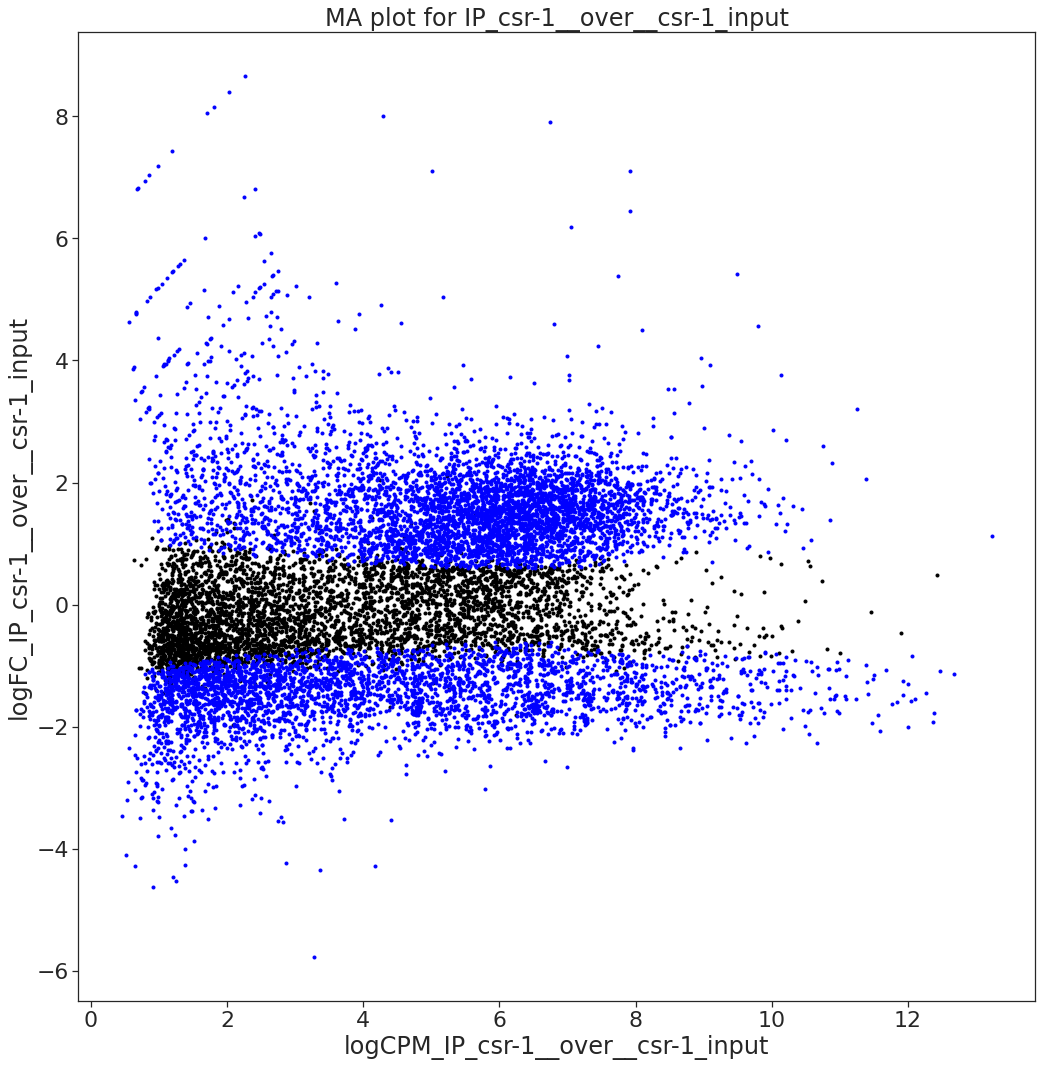

In [45]:
df = prepare_df(df_1_path, df_1_name)
plot_MA(df, df_1_name)

In [46]:
df.loc[df["id"].isin(red_points_IP_WAGO_1_dpf_3_null_specific), 
       f"Significant_{df_1_name}"] = "IP_WAGO_1_dpf_3_null_specific"

df.loc[(df[f"FDR_{df_1_name}"] < 0.05) & 
       (df[f"logFC_{df_1_name}"] < 0) & 
       (df["id"].isin(red_points_IP_WAGO_1_dpf_3_null_specific)), 
       f"Significant_{df_1_name}"] = "FDR<0.05\nlogFC<0\nIP_WAGO_1_dpf_3_null_specific"

df.loc[(df[f"FDR_{df_1_name}"] < 0.05) & 
       (df[f"logFC_{df_1_name}"] > 0) & 
       (df["id"].isin(red_points_IP_WAGO_1_dpf_3_null_specific)), 
       f"Significant_{df_1_name}"] = "FDR<0.05\nlogFC>0\nIP_WAGO_1_dpf_3_null_specific"

In [47]:
df[f"Significant_{df_1_name}"].value_counts()

FDR<0.05                                            7737
No                                                  4009
IP_WAGO_1_dpf_3_null_specific                        265
FDR<0.05\nlogFC>0\nIP_WAGO_1_dpf_3_null_specific     179
FDR<0.05\nlogFC<0\nIP_WAGO_1_dpf_3_null_specific     113
Name: Significant_IP_csr-1__over__csr-1_input, dtype: int64

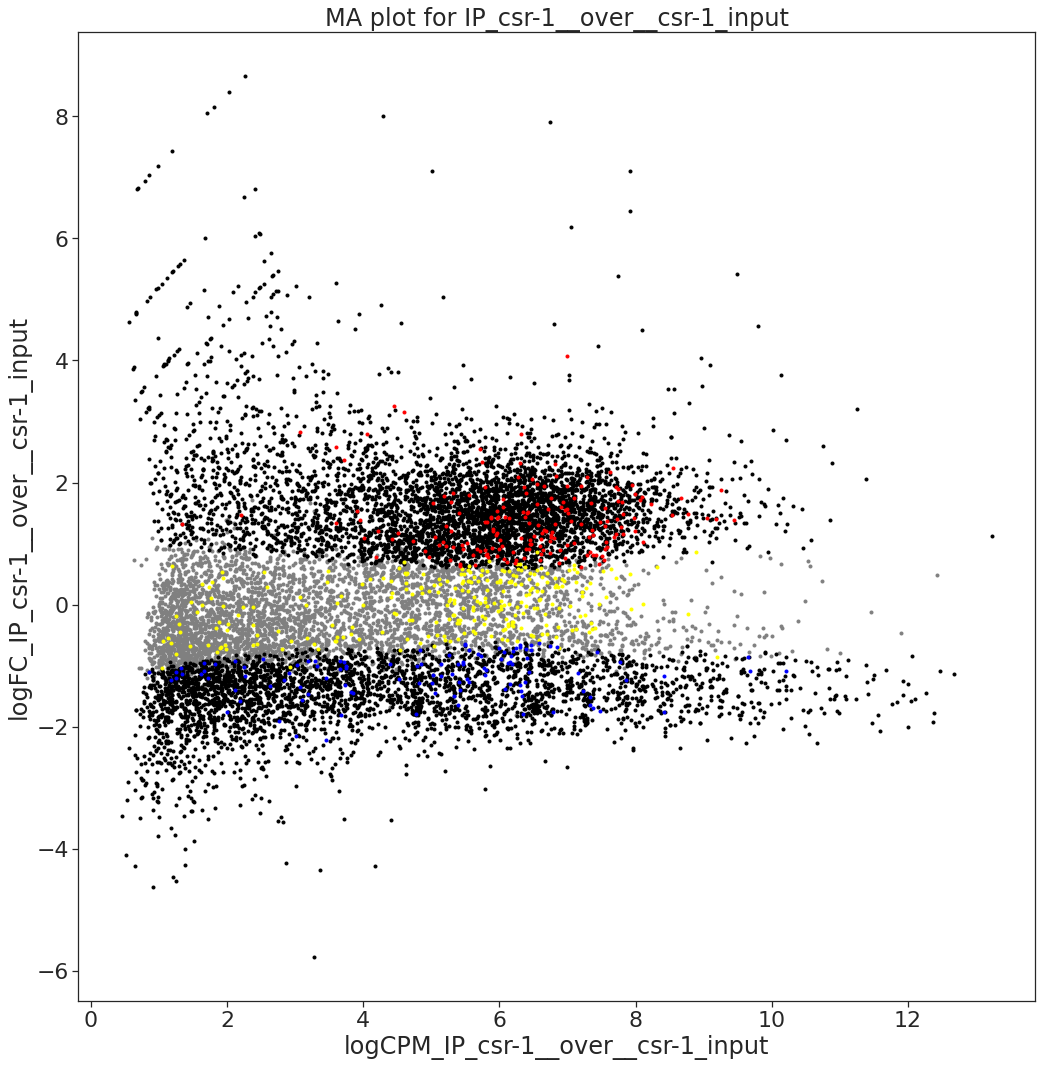

In [48]:
sns_plot = sns.lmplot(x=f"logCPM_{df_1_name}",
                      y=f"logFC_{df_1_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_1_name}",
                      hue_order=["No", 
                                 "FDR<0.05", 
                                 "IP_WAGO_1_dpf_3_null_specific", 
                                 "FDR<0.05\nlogFC<0\nIP_WAGO_1_dpf_3_null_specific",
                                 "FDR<0.05\nlogFC>0\nIP_WAGO_1_dpf_3_null_specific"],
                      palette=["gray", "black", "yellow", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_1_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

In [49]:
df[df[f"Significant_{df_1_name}"].isin(
    ["IP_WAGO_1_dpf_3_null_specific", 
     "FDR<0.05\nlogFC<0\nIP_WAGO_1_dpf_3_null_specific",
     "FDR<0.05\nlogFC>0\nIP_WAGO_1_dpf_3_null_specific"]
)].to_csv("IP_WAGO_1_dpf_3_null_specific_in_CSR_1_IP_plot.tsv", header=True, index=False, sep="\t")

## 20. WAGO-1 bound----WAGO-3 bound

In [50]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_2_name = ip__Input_WAGO_3__IP_WAGO_3_name

Significant
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...         2435
No                                                         2295
FDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_I...          648
FDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_I...          513

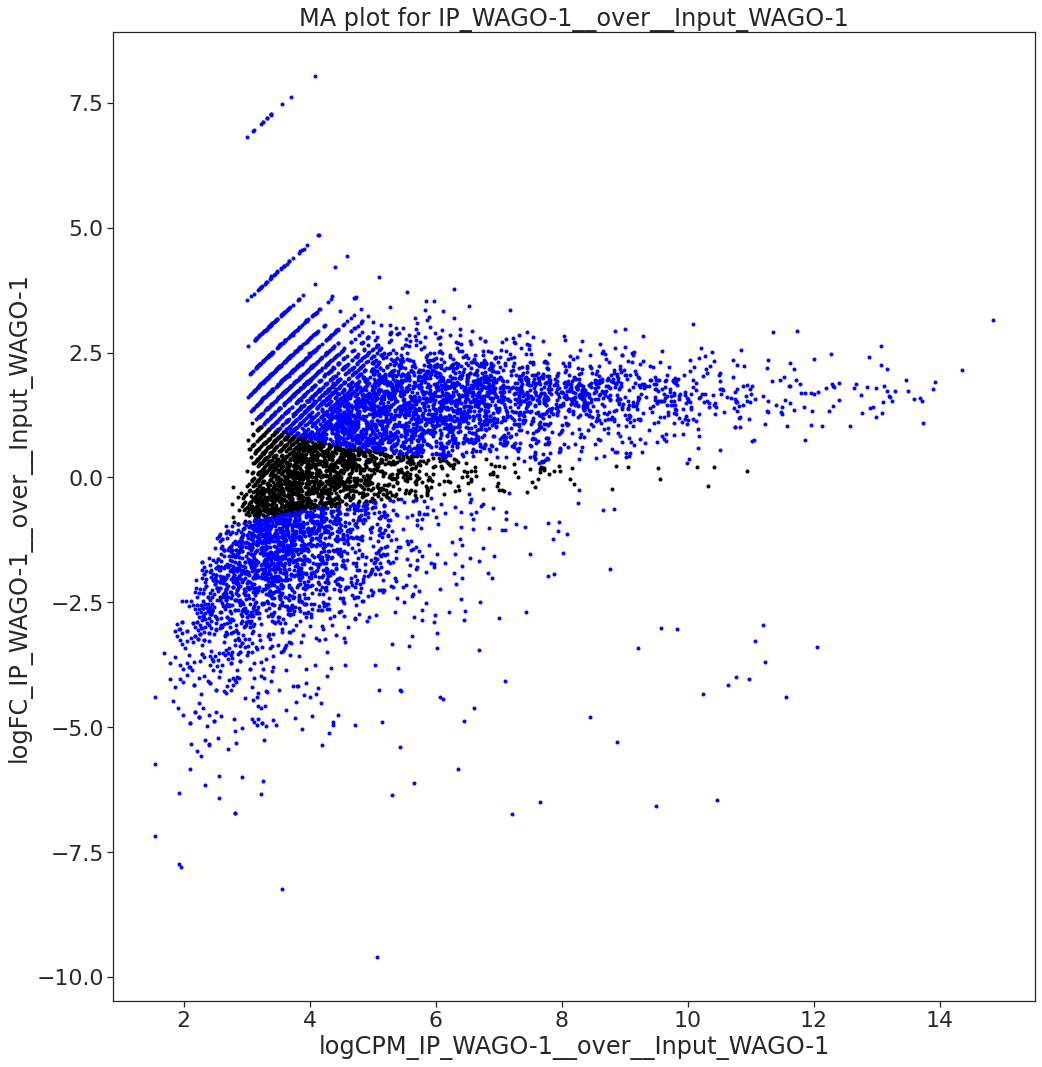

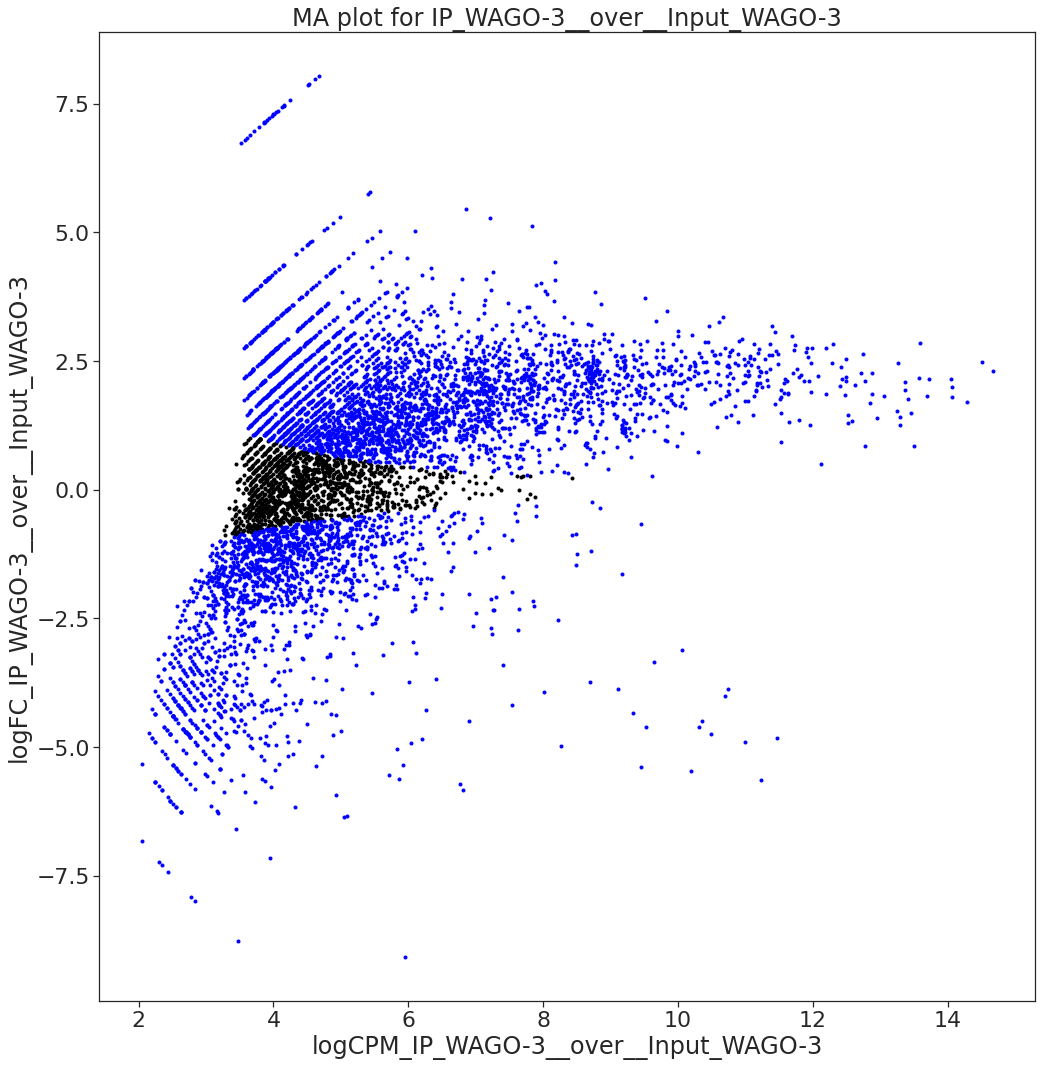

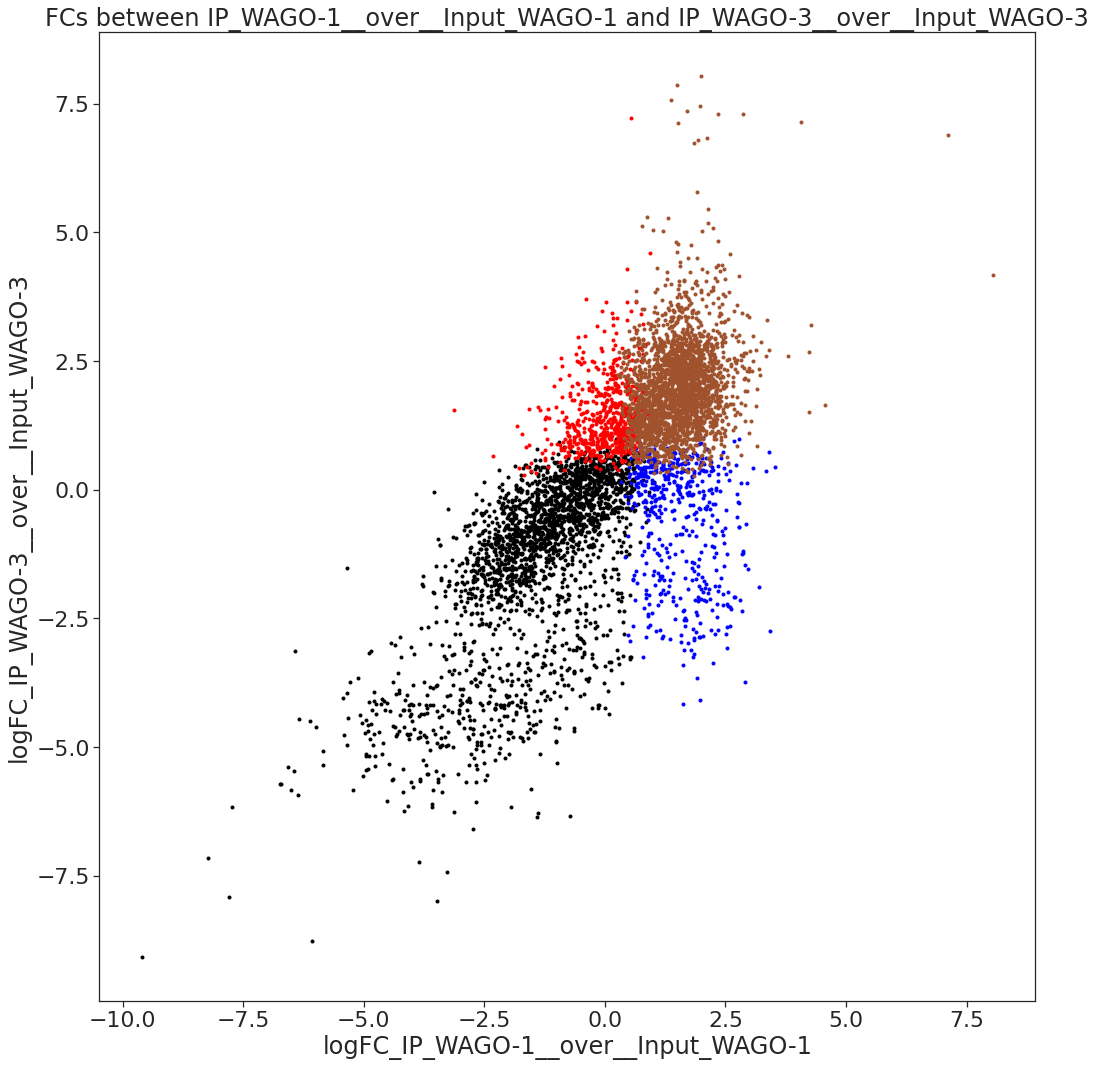

In [51]:
df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
            (df_all[f"logFC_{df_1_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

df_all.loc[(df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"FDR_{df_2_name}"]<0.05) &
            (df_all[f"logFC_{df_2_name}"]>0),
            "Significant"] = f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"

plot_FC_correlation(df_all, df_1_name, df_2_name, "Significant", ["No", 
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0", 
                                                                  f"FDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0",
                                                                  f"FDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nFDR_{df_2_name}<0.05\nlogFC_{df_2_name}>0"])

pd.DataFrame(df_all["Significant"].value_counts())